## Imports etc.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
import networkx as nx

import utils

pd.set_option('display.max_columns', 500)

FREQ = '05S'  # '05S', not '5S', if you want to run it on 5 seconds
DATA_COL = 'ma_slope'
CORR_THRESHOLD = 0.75

MAX_LAGS_ONE_DIR = int(600/int(FREQ[:-1]))
MAX_LAGS_ONE_DIR

120

## Load Output from Q3 Notebook, based on differenced values

In [2]:
max_output = utils.load_combine_output()  # all correlation pairs with correlation > 0.5
smooth_df = utils.load_smooth_df()

In [3]:
max_output

correlation  lag
(YQIV8384792, UBDD6270540)     0.999661 -1.0
(YQIV8384792, WECE8118101)     0.991910 -1.0
(YQIV8384792, FRSE9448289)     0.998657 -1.0
(YQIV8384792, FRMT5013249)     0.605357 -7.0
(YQIV8384792, GAOJ1253882)     0.546278 -7.0
...                                 ...  ...
(JWYX3983879, WWEF2365546)     1.000000 -1.0
(JWYX3983879, HEOV5851414)     1.000000 -1.0
(JWYX3983879, NYZP9283896)     1.000000 -1.0
(JWYX3983879, MIPD6103611)     1.000000 -1.0
(JWYX3983879, GRWS2213993)     1.000000 -1.0

[836 rows x 2 columns]

## Extend data

An overview of characteristics for each sensor is made, to see whether we can trust the correlation values and therefore use the sensors in the visulisation.

### Type

Get the type of each sensor and add to data

In [4]:
type_mapping = utils.create_type_mapping(smooth_df)

In [5]:
max_output['type_one'] = [type_mapping[pair[0]] for pair in max_output.index.tolist()]
max_output['type_two'] = [type_mapping[pair[1]] for pair in max_output.index.tolist()]

### Hugely interpolated

Some sensors have a huge amount of interpolated values, which might result in False correlations. 

In [6]:
huge_interpolated = utils.get_hugely_interpolated_sensors()  # list of sensors that are interpolated a lot

Directly load parquet file fast. 


In [7]:
max_output['huge_interpolated_one'] = [1 if pair[0] in huge_interpolated else 0 for pair in max_output.index.tolist()]
max_output['huge_interpolated_two'] = [1 if pair[1] in huge_interpolated else 0 for pair in max_output.index.tolist()]

### Autocorrelation

A few sensors still have a high autocorrelation, which will be labeled here.

In [8]:
all_sensors = utils.get_all_sensors_from_df(max_output)

In [9]:
autocorr_mapping = {}
for sensor in all_sensors:
    autocorr_mapping[sensor] = utils.check_high_autocorr(sensor, smooth_df)

In [10]:
max_output['autocorr_one'] = [autocorr_mapping[pair[0]] for pair in max_output.index.tolist()]
max_output['autocorr_two'] = [autocorr_mapping[pair[1]] for pair in max_output.index.tolist()]

### Get signs of number of lags for each pair

Since we are mostly interested in the 'direction' how sensors are connected, the lag value doesn't matter that much but the sign does. 

In [11]:
max_output['sign'] = utils.check_sign(max_output['lag'].tolist())

## Check statistics of extended data

In [12]:
max_output

correlation  lag     type_one     type_two  \
(YQIV8384792, UBDD6270540)     0.999661 -1.0         flow         flow   
(YQIV8384792, WECE8118101)     0.991910 -1.0         flow         flow   
(YQIV8384792, FRSE9448289)     0.998657 -1.0         flow         flow   
(YQIV8384792, FRMT5013249)     0.605357 -7.0         flow   percentage   
(YQIV8384792, GAOJ1253882)     0.546278 -7.0         flow   percentage   
...                                 ...  ...          ...          ...   
(JWYX3983879, WWEF2365546)     1.000000 -1.0  categorical  categorical   
(JWYX3983879, HEOV5851414)     1.000000 -1.0  categorical  categorical   
(JWYX3983879, NYZP9283896)     1.000000 -1.0  categorical  categorical   
(JWYX3983879, MIPD6103611)     1.000000 -1.0  categorical  categorical   
(JWYX3983879, GRWS2213993)     1.000000 -1.0  categorical  categorical   

                            huge_interpolated_one  huge_interpolated_two  \
(YQIV8384792, UBDD6270540)                      0                      0   
(YQIV8384792, WECE8118101)                      0                      0   
(YQIV8384792, FRSE9448289)                      0                      0   
(YQIV8384792, FRMT5013249)                      0                      0   
(YQIV8384792, GAOJ1253882)                      0                      0   
...                                           ...                    ...   
(JWYX3983879, WWEF2365546)                      1                      1   
(JWYX3983879, HEOV5851414)                      1                      1   
(JWYX3983879, NYZP9283896)                      1                      1   
(JWYX3983879, MIPD6103611)                      1                      1   
(JWYX3983879, GRWS2213993)                      1                      1   

                            autocorr_one  autocorr_two  sign  
(YQIV8384792, UBDD6270540)           0.0           0.0    -1  
(YQIV8384792, WECE8118101)           0.0           0.0    -1  
(YQIV8384792, FRSE9448289)           0.0           0.0    -1  
(YQIV8384792, FRMT5013249)           0.0           0.0    -1  
(YQIV8384792, GAOJ1253882)           0.0           0.0    -1  
...                                  ...           ...   ...  
(JWYX3983879, WWEF2365546)           0.0           0.0    -1  
(JWYX3983879, HEOV5851414)           0.0           0.0    -1  
(JWYX3983879, NYZP9283896)           0.0           0.0    -1  
(JWYX3983879, MIPD6103611)           0.0           0.0    -1  
(JWYX3983879, GRWS2213993)           0.0           0.0    -1  

[836 rows x 9 columns]

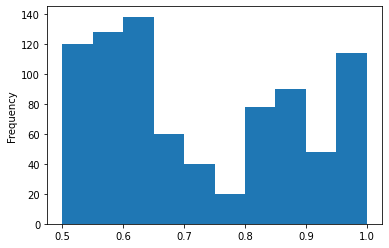

In [13]:
max_output['correlation'].plot.hist();

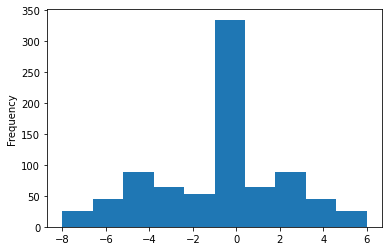

In [14]:
max_output['lag'].plot.hist();

In [15]:
max_output[['type_one', 'type_two']].value_counts()

type_one     type_two   
flow         flow           162
categorical  categorical     76
flow         percentage      61
percentage   flow            61
flow         categorical     46
                           ... 
number       current          1
current      frequency        1
             number           1
frequency    number           1
             temperature      1
Length: 69, dtype: int64

In [16]:
max_output[['huge_interpolated_one', 'huge_interpolated_two']].value_counts()

huge_interpolated_one  huge_interpolated_two
0                      0                        778
1                      1                         58
dtype: int64

In [17]:
max_output[['autocorr_one', 'autocorr_two']].value_counts()

autocorr_one  autocorr_two
0.0           0.0             800
0.5           0.0              17
0.0           0.5              17
1.0           1.0               2
dtype: int64

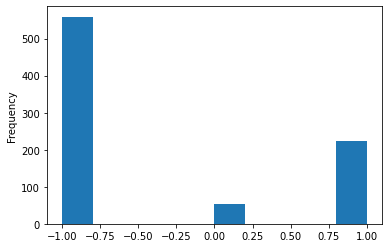

In [18]:
max_output['sign'].plot.hist();

In [19]:
max_output.reset_index().groupby(['index', 'lag'])['correlation'].count()

index                       lag 
(ACSH9824768, BCNT5607274)  -5.0    1
(ACSH9824768, BXWS8009878)  -1.0    1
(ACSH9824768, CJYY7281535)  -5.0    1
(ACSH9824768, CVKK2848713)  -4.0    1
(ACSH9824768, DOGW6414031)  -4.0    1
                                   ..
(YUQQ6684067, JWYX3983879)  -1.0    1
(YUQQ6684067, MIPD6103611)  -1.0    1
(YUQQ6684067, NYZP9283896)  -1.0    1
(YUQQ6684067, RJYE7545561)  -1.0    1
(YUQQ6684067, WWEF2365546)  -1.0    1
Name: correlation, Length: 836, dtype: int64

## Filter data to most relevant sensors

Based on correlation value, whether the sensor has been interpolated a lot and whether there is still some autocorrelation present in the differenced data. 

In [20]:
filtered_max_output = max_output[max_output['correlation'] > CORR_THRESHOLD]
filtered_max_output = filtered_max_output[filtered_max_output['huge_interpolated_one'] == 0]
filtered_max_output = filtered_max_output[filtered_max_output['huge_interpolated_two'] == 0]
filtered_max_output = filtered_max_output[filtered_max_output['autocorr_one'] == 0]
filtered_max_output = filtered_max_output[filtered_max_output['autocorr_one'] == 0]
filtered_max_output

correlation  lag     type_one     type_two  \
(YQIV8384792, UBDD6270540)     0.999661 -1.0         flow         flow   
(YQIV8384792, WECE8118101)     0.991910 -1.0         flow         flow   
(YQIV8384792, FRSE9448289)     0.998657 -1.0         flow         flow   
(YQIV8384792, KUBF4965544)     0.981368 -2.0         flow            0   
(WJTY3058662, PFQK6744816)     0.830064 -3.0         flow         flow   
...                                 ...  ...          ...          ...   
(RZMH3493151, JAAM9433816)     0.810192 -1.0  categorical    frequency   
(RZMH3493151, ETLU2529107)     0.839604 -1.0  categorical  categorical   
(RZMH3493151, QNMD7371426)     0.847137 -1.0  categorical  categorical   
(RZMH3493151, AQNB3577758)     0.844072 -1.0  categorical  categorical   
(RZMH3493151, SIJC9876029)     0.843181 -1.0  categorical  categorical   

                            huge_interpolated_one  huge_interpolated_two  \
(YQIV8384792, UBDD6270540)                      0                      0   
(YQIV8384792, WECE8118101)                      0                      0   
(YQIV8384792, FRSE9448289)                      0                      0   
(YQIV8384792, KUBF4965544)                      0                      0   
(WJTY3058662, PFQK6744816)                      0                      0   
...                                           ...                    ...   
(RZMH3493151, JAAM9433816)                      0                      0   
(RZMH3493151, ETLU2529107)                      0                      0   
(RZMH3493151, QNMD7371426)                      0                      0   
(RZMH3493151, AQNB3577758)                      0                      0   
(RZMH3493151, SIJC9876029)                      0                      0   

                            autocorr_one  autocorr_two  sign  
(YQIV8384792, UBDD6270540)           0.0           0.0    -1  
(YQIV8384792, WECE8118101)           0.0           0.0    -1  
(YQIV8384792, FRSE9448289)           0.0           0.0    -1  
(YQIV8384792, KUBF4965544)           0.0           0.0    -1  
(WJTY3058662, PFQK6744816)           0.0           0.0    -1  
...                                  ...           ...   ...  
(RZMH3493151, JAAM9433816)           0.0           0.0    -1  
(RZMH3493151, ETLU2529107)           0.0           0.0    -1  
(RZMH3493151, QNMD7371426)           0.0           0.0    -1  
(RZMH3493151, AQNB3577758)           0.0           0.0    -1  
(RZMH3493151, SIJC9876029)           0.0           0.0    -1  

[292 rows x 9 columns]

## Check statistics of sensor subset

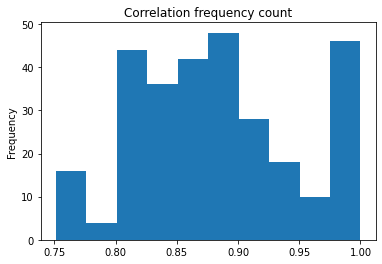

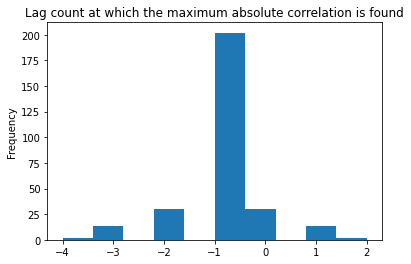

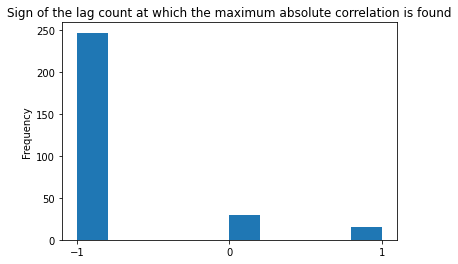

In [37]:
utils.plot_stats_of_output_scores(filtered_max_output,
                                  savefig=False)

# Q4

* Can you identify the relative “position” of the sensors with respect to each other? 
* Can you identify whether they are positioned in the same stream or not? 
* Can you identify the position of the buffers in the stream?

# Q5

* What is a good way to visualize the relative “positions” of the different sensors? 
    * Note that we expect this to be schematic because we can only determine lags and correlations

Both questions are solved at the same time. By visualizing the positions we want to see the connections of the sensors with one another and therefore identify the relative positions. 

# Network Analysis

## Create network analysis dataframes

In [22]:
full_df, edges_df, nodes_df = utils.create_network_dfs(filtered_max_output)

In [23]:
full_df.head()

node_one     node_two  correlation  lag type_one type_two  \
0  YQIV8384792  UBDD6270540     0.999661 -1.0     flow     flow   
1  YQIV8384792  WECE8118101     0.991910 -1.0     flow     flow   
2  YQIV8384792  FRSE9448289     0.998657 -1.0     flow     flow   
3  YQIV8384792  KUBF4965544     0.981368 -2.0     flow        0   
4  WJTY3058662  PFQK6744816     0.830064 -3.0     flow     flow   

   huge_interpolated_one  huge_interpolated_two  autocorr_one  autocorr_two  \
0                      0                      0           0.0           0.0   
1                      0                      0           0.0           0.0   
2                      0                      0           0.0           0.0   
3                      0                      0           0.0           0.0   
4                      0                      0           0.0           0.0   

   sign  
0    -1  
1    -1  
2    -1  
3    -1  
4    -1

In [24]:
edges_df.head()

node_one     node_two  correlation  lag  sign
0  YQIV8384792  UBDD6270540     0.999661 -1.0    -1
1  YQIV8384792  WECE8118101     0.991910 -1.0    -1
2  YQIV8384792  FRSE9448289     0.998657 -1.0    -1
3  YQIV8384792  KUBF4965544     0.981368 -2.0    -1
4  WJTY3058662  PFQK6744816     0.830064 -3.0    -1

In [25]:
nodes_df.head()

node  type  huge_interpolated  autocorr
0   YQIV8384792  flow                  0       0.0
4   WJTY3058662  flow                  0       0.0
19  UBDD6270540  flow                  0       0.0
23  OGXF8790955  flow                  0       0.0
26  WECE8118101  flow                  0       0.0

## Look at subset of sensors in one plot

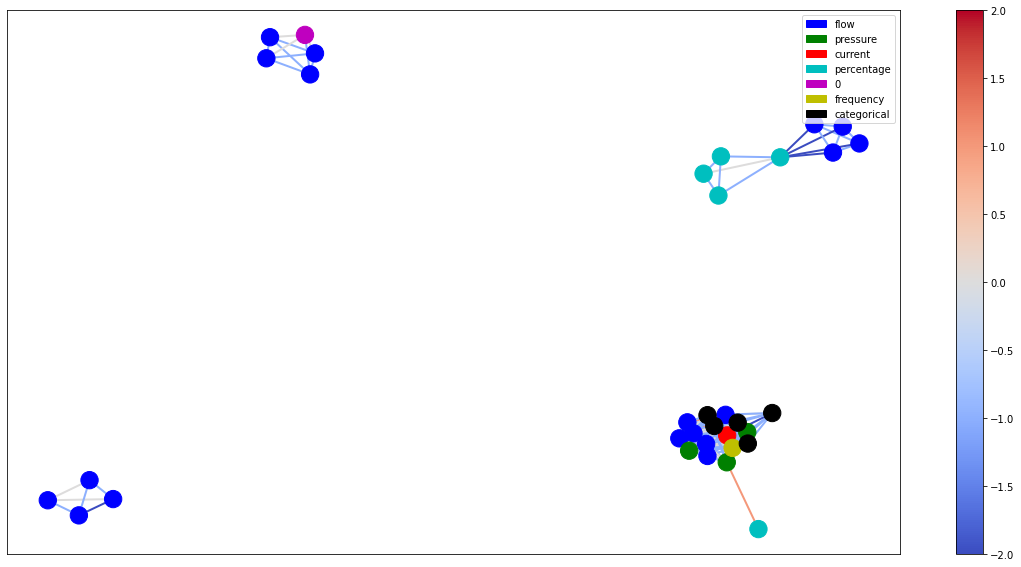

In [52]:
G = utils.create_full_graph(edges_df, nodes_df, savefig=False)

## Look at separate clusters

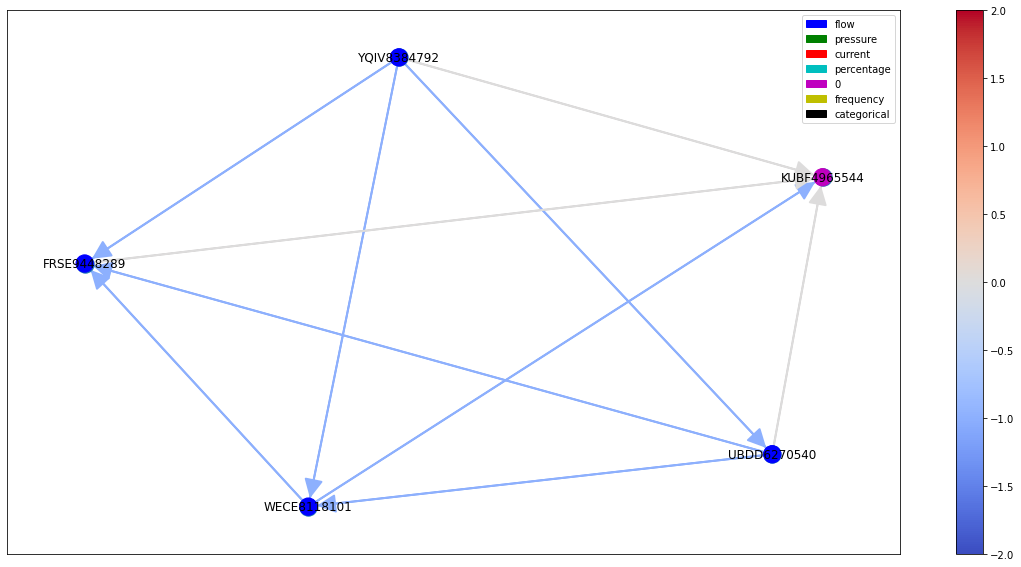

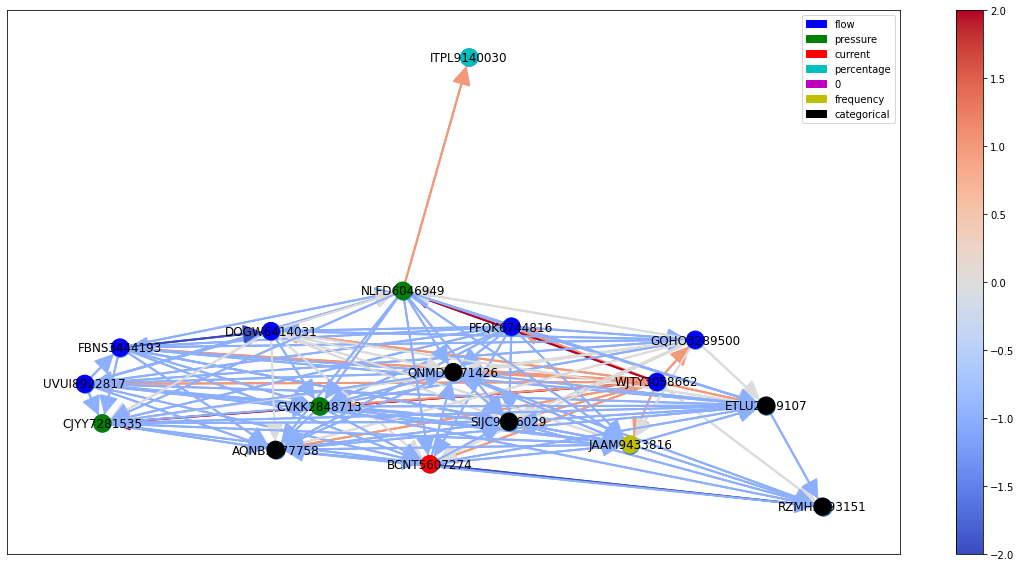

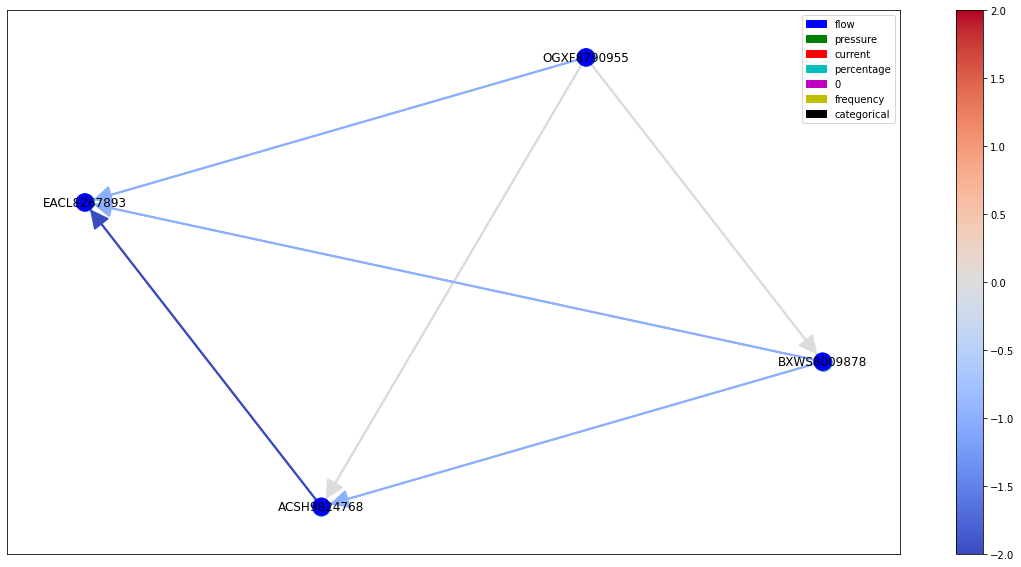

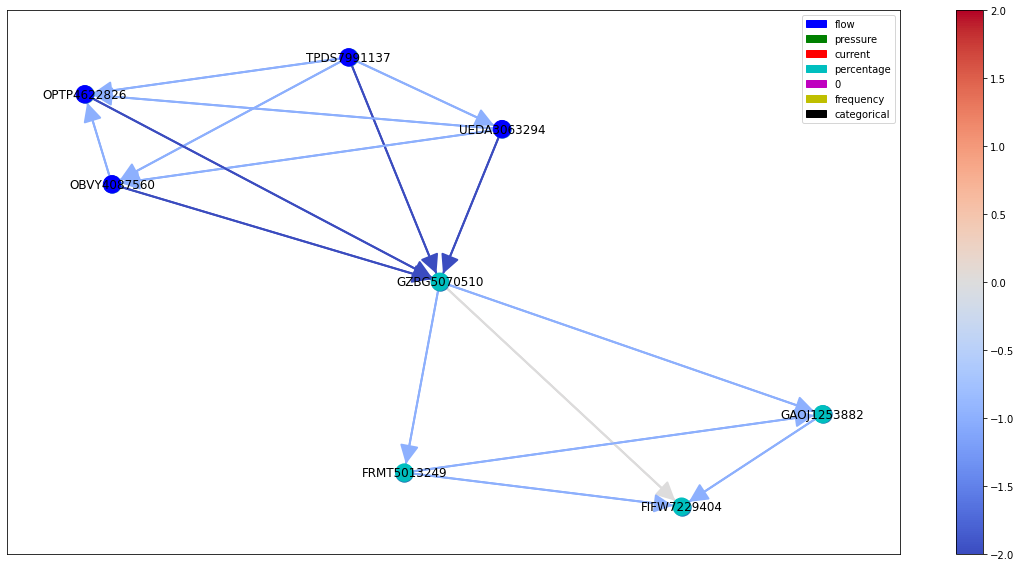

In [53]:
extracted_graphs = utils.create_separated_graphs(G, edges_df, nodes_df, with_labels=True, figsize=(20,10), savefig=False)

## Look at degrees

In [28]:
edges_df[edges_df['node_one'] == 'ITPL9140030']

node_one     node_two  correlation  lag  sign
188  ITPL9140030  NLFD6046949     0.753987  1.0     1

# Plot all sensor pairs

In [39]:
filtered_max_output

correlation  lag     type_one     type_two  \
(YQIV8384792, UBDD6270540)     0.999661 -1.0         flow         flow   
(YQIV8384792, WECE8118101)     0.991910 -1.0         flow         flow   
(YQIV8384792, FRSE9448289)     0.998657 -1.0         flow         flow   
(YQIV8384792, KUBF4965544)     0.981368 -2.0         flow            0   
(WJTY3058662, PFQK6744816)     0.830064 -3.0         flow         flow   
...                                 ...  ...          ...          ...   
(RZMH3493151, JAAM9433816)     0.810192 -1.0  categorical    frequency   
(RZMH3493151, ETLU2529107)     0.839604 -1.0  categorical  categorical   
(RZMH3493151, QNMD7371426)     0.847137 -1.0  categorical  categorical   
(RZMH3493151, AQNB3577758)     0.844072 -1.0  categorical  categorical   
(RZMH3493151, SIJC9876029)     0.843181 -1.0  categorical  categorical   

                            huge_interpolated_one  huge_interpolated_two  \
(YQIV8384792, UBDD6270540)                      0                      0   
(YQIV8384792, WECE8118101)                      0                      0   
(YQIV8384792, FRSE9448289)                      0                      0   
(YQIV8384792, KUBF4965544)                      0                      0   
(WJTY3058662, PFQK6744816)                      0                      0   
...                                           ...                    ...   
(RZMH3493151, JAAM9433816)                      0                      0   
(RZMH3493151, ETLU2529107)                      0                      0   
(RZMH3493151, QNMD7371426)                      0                      0   
(RZMH3493151, AQNB3577758)                      0                      0   
(RZMH3493151, SIJC9876029)                      0                      0   

                            autocorr_one  autocorr_two  sign  
(YQIV8384792, UBDD6270540)           0.0           0.0    -1  
(YQIV8384792, WECE8118101)           0.0           0.0    -1  
(YQIV8384792, FRSE9448289)           0.0           0.0    -1  
(YQIV8384792, KUBF4965544)           0.0           0.0    -1  
(WJTY3058662, PFQK6744816)           0.0           0.0    -1  
...                                  ...           ...   ...  
(RZMH3493151, JAAM9433816)           0.0           0.0    -1  
(RZMH3493151, ETLU2529107)           0.0           0.0    -1  
(RZMH3493151, QNMD7371426)           0.0           0.0    -1  
(RZMH3493151, AQNB3577758)           0.0           0.0    -1  
(RZMH3493151, SIJC9876029)           0.0           0.0    -1  

[292 rows x 9 columns]

In [ ]:
PLOT_ALL_SENSOR_PAIRS = False

%%%%%%%%%%%%%%%%%%%%%%%%%
%%%% SIGN: 0
%%%%%%%%%%%%%%%%%%%%%%%%%
Index of pair: 0
Corr at time lag: 0.0


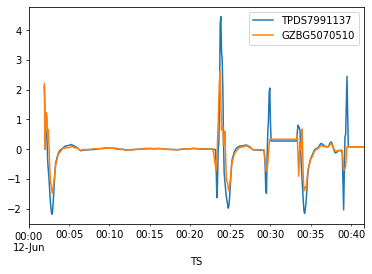

Index of pair: 1
Corr at time lag: 0.0


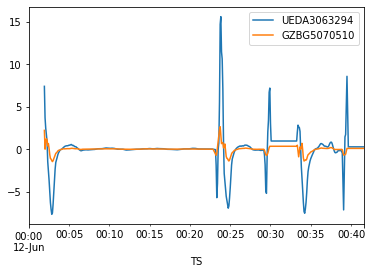

Index of pair: 2
Corr at time lag: 0.0


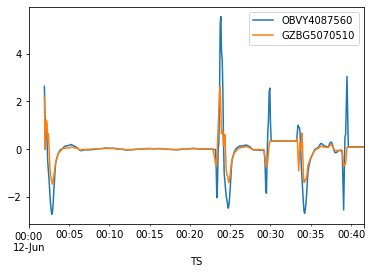

Index of pair: 3
Corr at time lag: 0.0


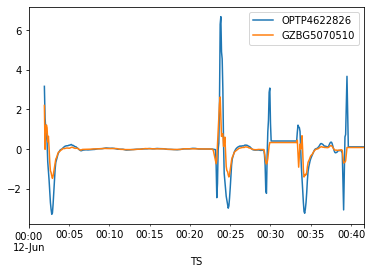

Index of pair: 4
Corr at time lag: 0.0


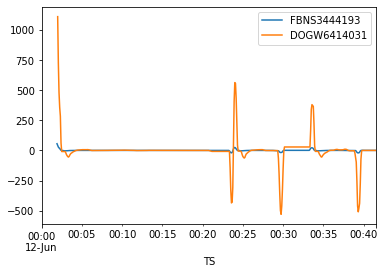

Index of pair: 5
Corr at time lag: 0.0


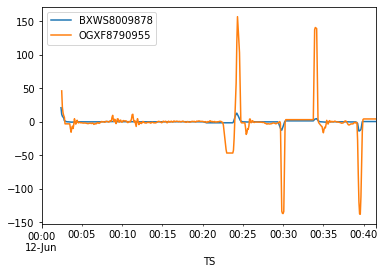

Index of pair: 6
Corr at time lag: 0.0


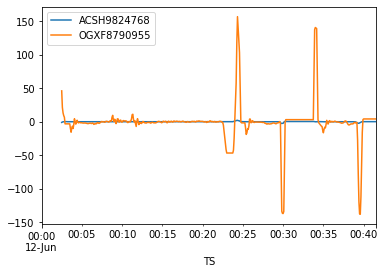

Index of pair: 7
Corr at time lag: 0.0


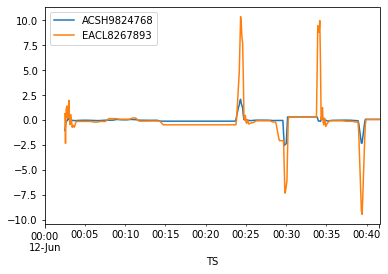

Index of pair: 8
Corr at time lag: 0.0


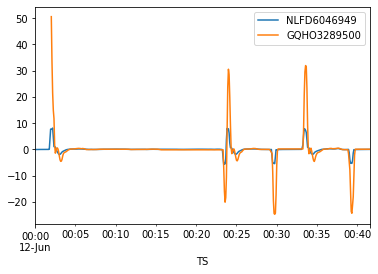

Index of pair: 9
Corr at time lag: 0.0


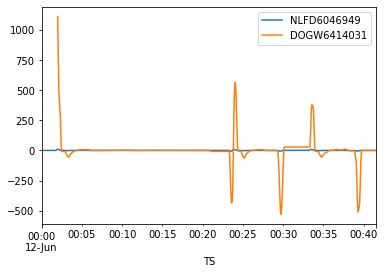

Index of pair: 10
Corr at time lag: 0.0


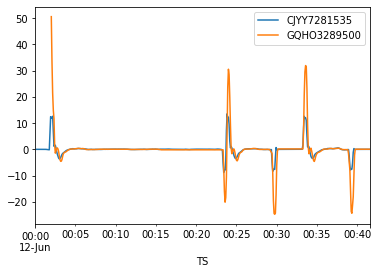

Index of pair: 11
Corr at time lag: 0.0


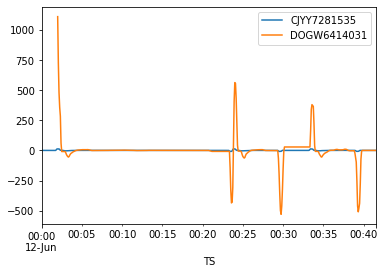

Index of pair: 12
Corr at time lag: 0.0


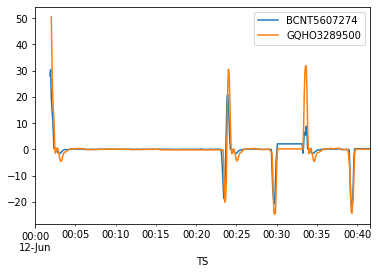

Index of pair: 13
Corr at time lag: 0.0


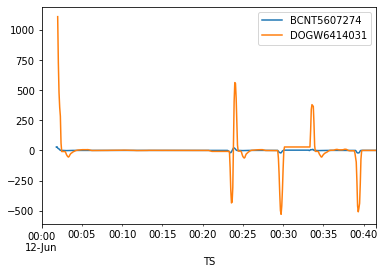

Index of pair: 14
Corr at time lag: 0.0


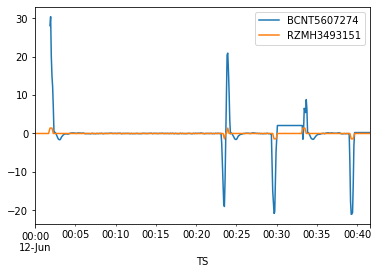

Index of pair: 15
Corr at time lag: 0.0


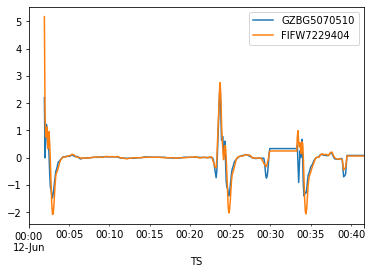

Index of pair: 16
Corr at time lag: 0.0


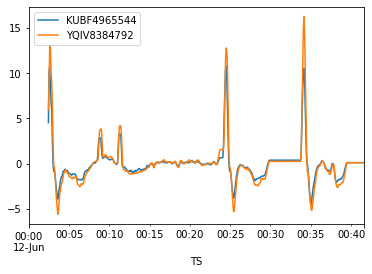

Index of pair: 17
Corr at time lag: 0.0


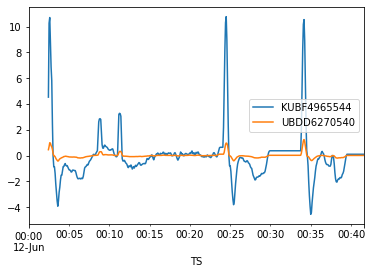

Index of pair: 18
Corr at time lag: 0.0


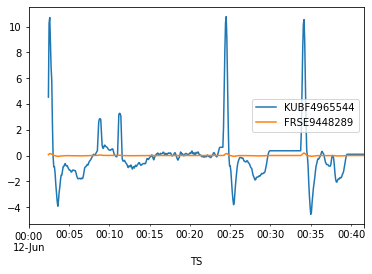

Index of pair: 19
Corr at time lag: 0.0


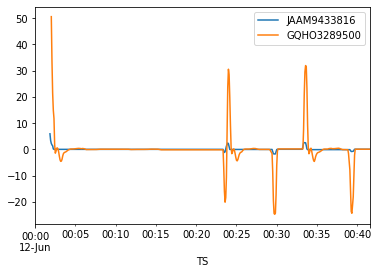

Index of pair: 20
Corr at time lag: 0.0


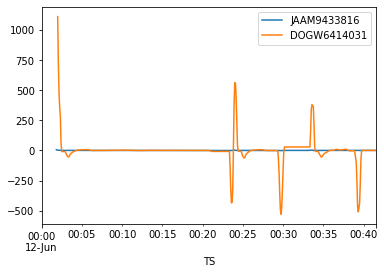

Index of pair: 21
Corr at time lag: 0.0


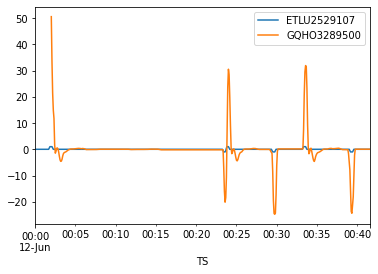

Index of pair: 22
Corr at time lag: 0.0


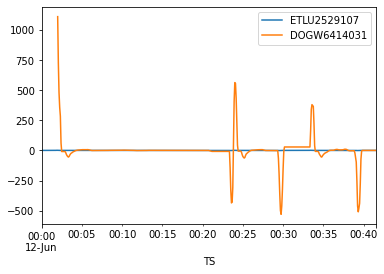

Index of pair: 23
Corr at time lag: 0.0


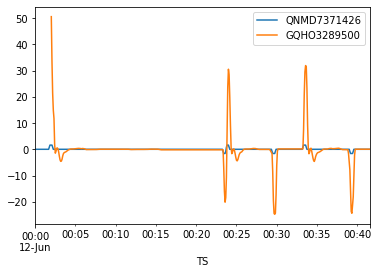

Index of pair: 24
Corr at time lag: 0.0


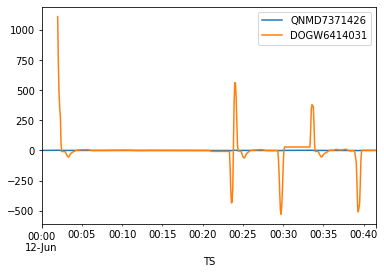

Index of pair: 25
Corr at time lag: 0.0


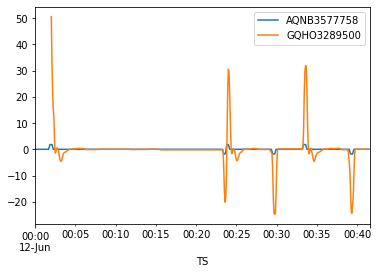

Index of pair: 26
Corr at time lag: 0.0


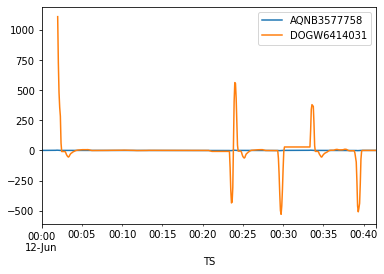

Index of pair: 27
Corr at time lag: 0.0


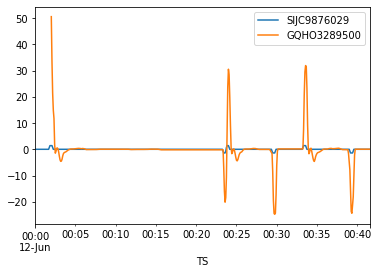

Index of pair: 28
Corr at time lag: 0.0


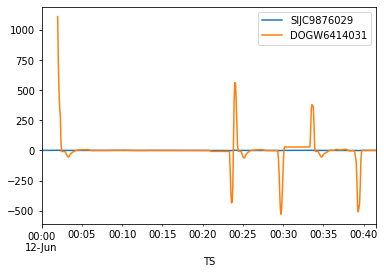

Index of pair: 29
Corr at time lag: 0.0


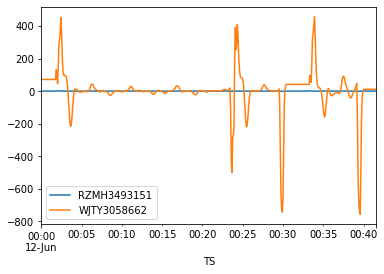

%%%%%%%%%%%%%%%%%%%%%%%%%
%%%% SIGN: -1
%%%%%%%%%%%%%%%%%%%%%%%%%
Index of pair: 0
Corr at time lag: -1.0


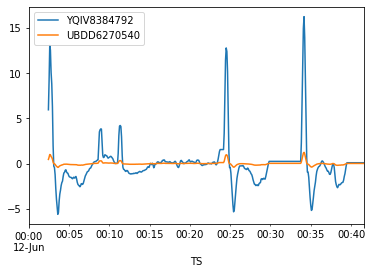

Index of pair: 1
Corr at time lag: -1.0


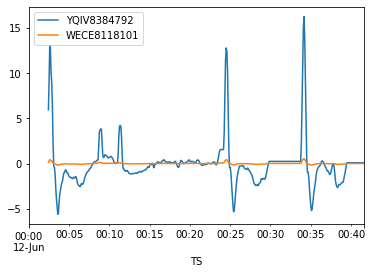

Index of pair: 2
Corr at time lag: -1.0


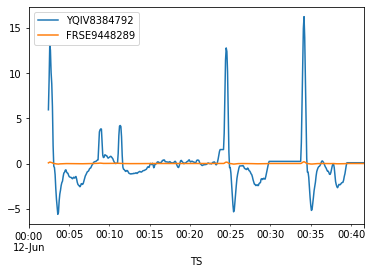

Index of pair: 3
Corr at time lag: -2.0


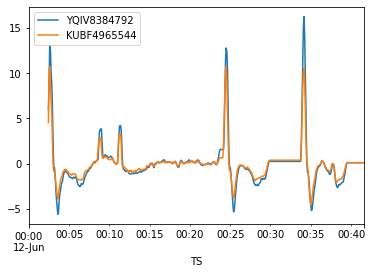

Index of pair: 4
Corr at time lag: -3.0


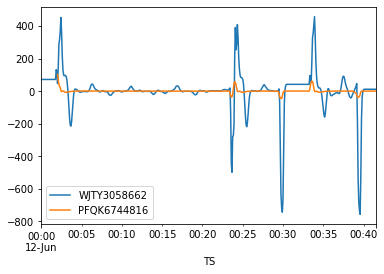

Index of pair: 5
Corr at time lag: -3.0


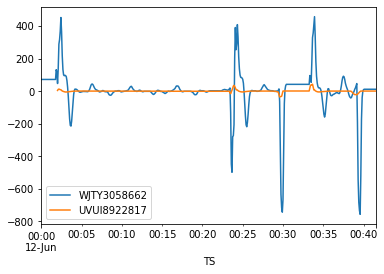

Index of pair: 6
Corr at time lag: -3.0


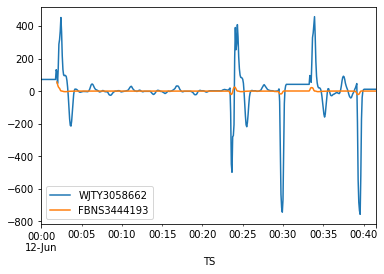

Index of pair: 7
Corr at time lag: -3.0


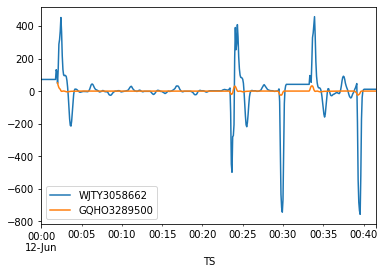

Index of pair: 8
Corr at time lag: -3.0


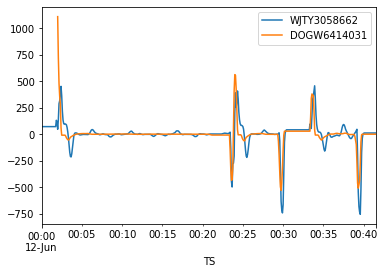

Index of pair: 9
Corr at time lag: -4.0


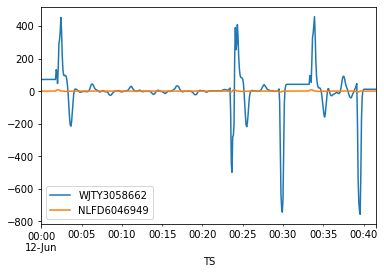

Index of pair: 10
Corr at time lag: -4.0


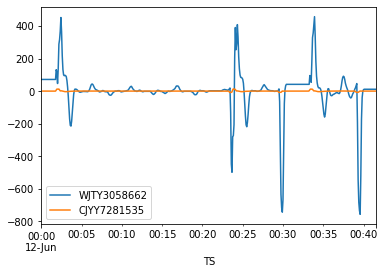

Index of pair: 11
Corr at time lag: -3.0


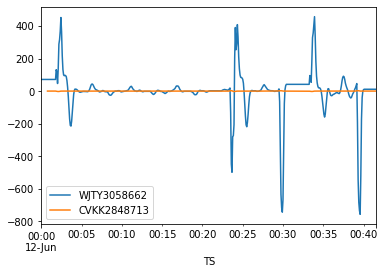

Index of pair: 12
Corr at time lag: -3.0


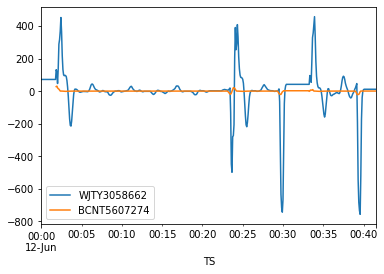

Index of pair: 13
Corr at time lag: -3.0


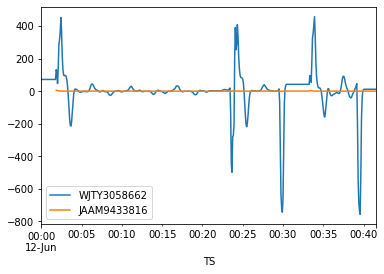

Index of pair: 14
Corr at time lag: -3.0


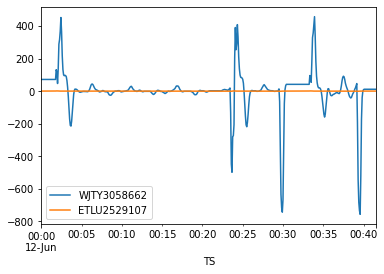

Index of pair: 15
Corr at time lag: -3.0


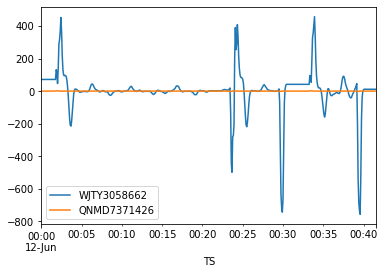

Index of pair: 16
Corr at time lag: -3.0


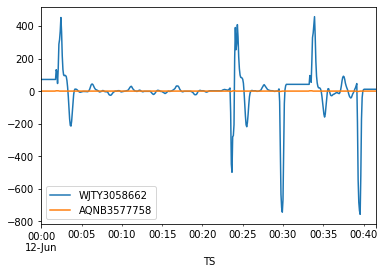

Index of pair: 17
Corr at time lag: -3.0


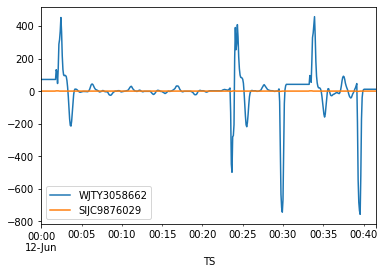

Index of pair: 18
Corr at time lag: -2.0


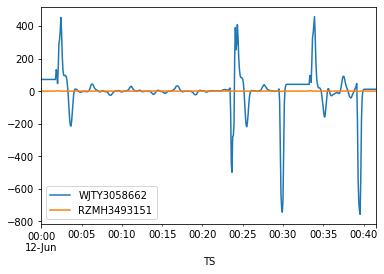

Index of pair: 19
Corr at time lag: -1.0


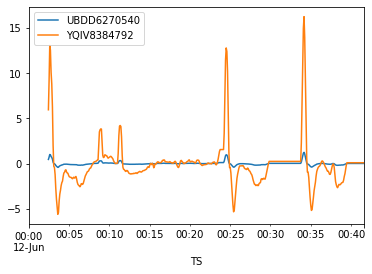

Index of pair: 20
Corr at time lag: -1.0


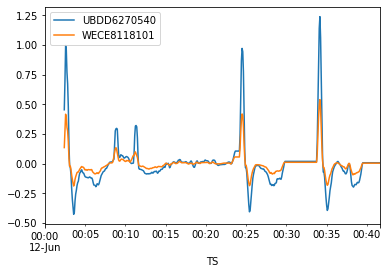

Index of pair: 21
Corr at time lag: -1.0


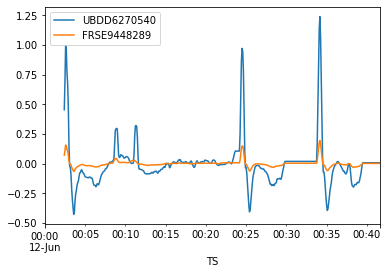

Index of pair: 22
Corr at time lag: -2.0


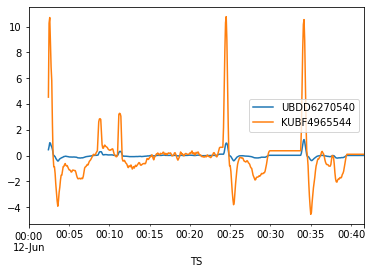

Index of pair: 23
Corr at time lag: -2.0


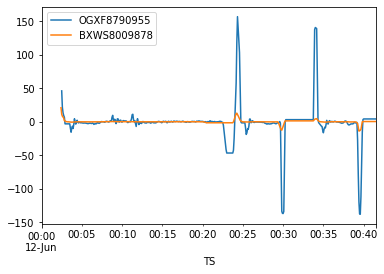

Index of pair: 24
Corr at time lag: -2.0


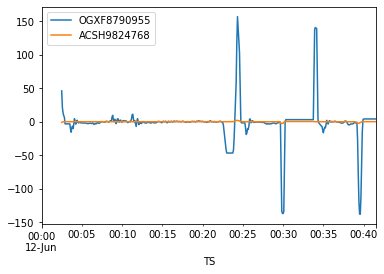

Index of pair: 25
Corr at time lag: -1.0


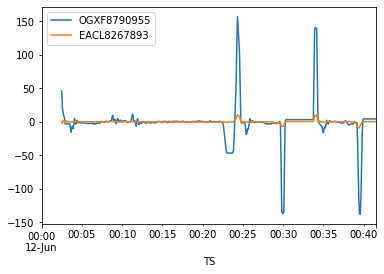

Index of pair: 26
Corr at time lag: -1.0


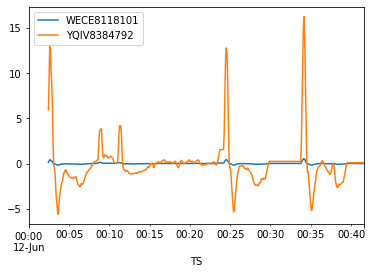

Index of pair: 27
Corr at time lag: -1.0


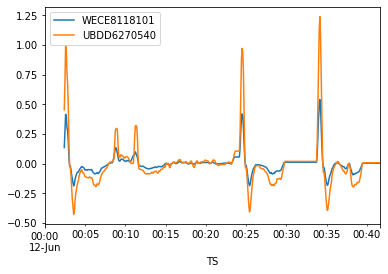

Index of pair: 28
Corr at time lag: -1.0


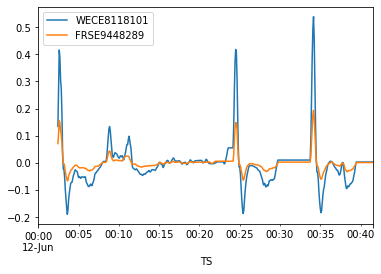

Index of pair: 29
Corr at time lag: -1.0


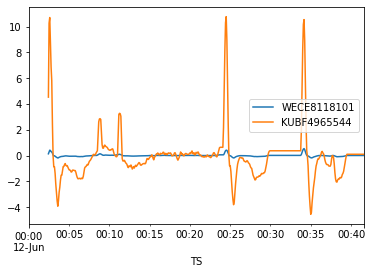

Index of pair: 30
Corr at time lag: -1.0


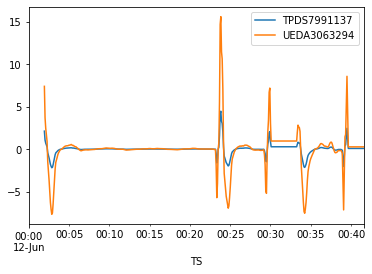

Index of pair: 31
Corr at time lag: -1.0


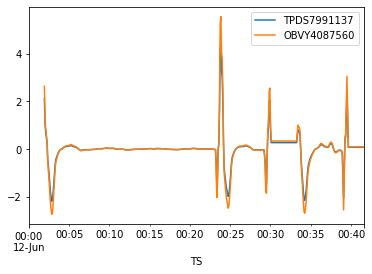

Index of pair: 32
Corr at time lag: -1.0


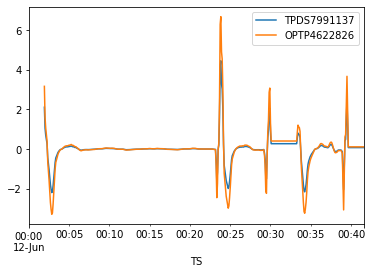

Index of pair: 33
Corr at time lag: -1.0


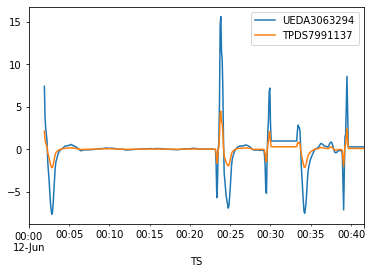

Index of pair: 34
Corr at time lag: -1.0


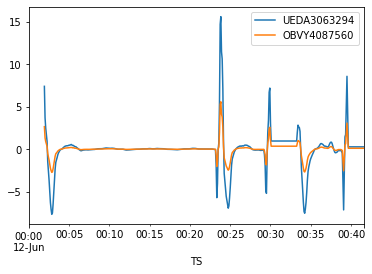

Index of pair: 35
Corr at time lag: -1.0


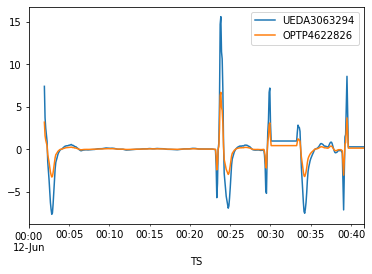

Index of pair: 36
Corr at time lag: -1.0


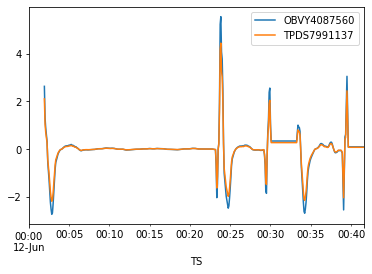

Index of pair: 37
Corr at time lag: -1.0


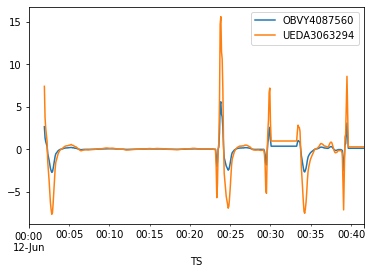

Index of pair: 38
Corr at time lag: -1.0


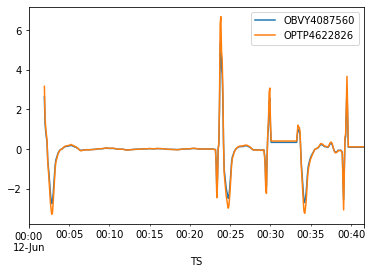

Index of pair: 39
Corr at time lag: -1.0


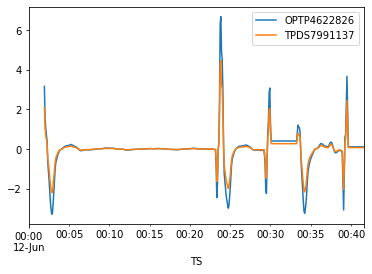

Index of pair: 40
Corr at time lag: -1.0


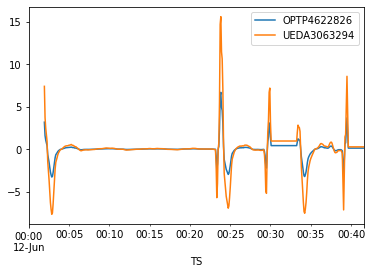

Index of pair: 41
Corr at time lag: -1.0


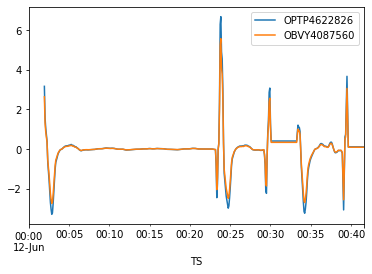

Index of pair: 42
Corr at time lag: -1.0


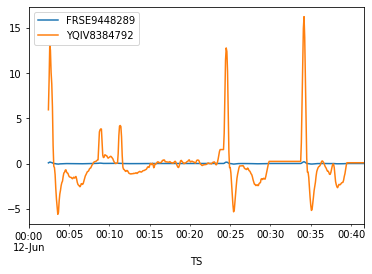

Index of pair: 43
Corr at time lag: -1.0


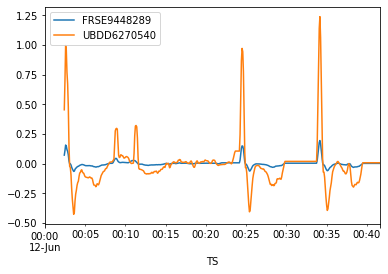

Index of pair: 44
Corr at time lag: -1.0


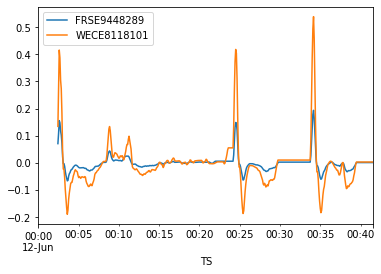

Index of pair: 45
Corr at time lag: -2.0


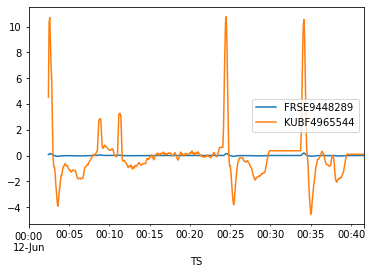

Index of pair: 46
Corr at time lag: -1.0


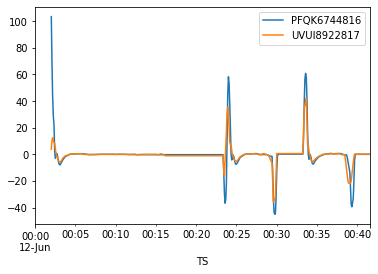

Index of pair: 47
Corr at time lag: -1.0


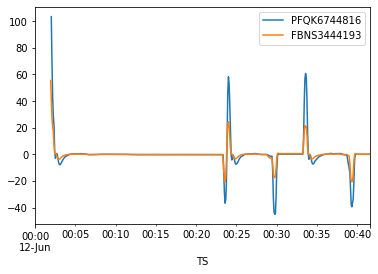

Index of pair: 48
Corr at time lag: -1.0


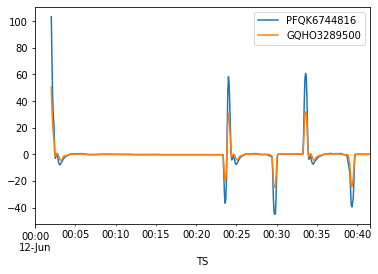

Index of pair: 49
Corr at time lag: -1.0


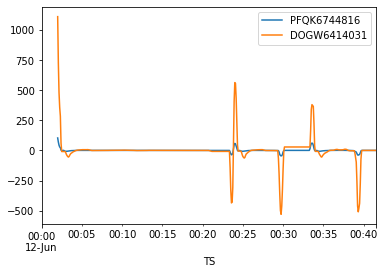

Index of pair: 50
Corr at time lag: -1.0


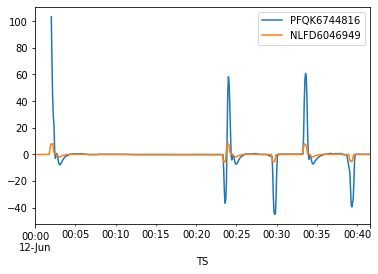

Index of pair: 51
Corr at time lag: -1.0


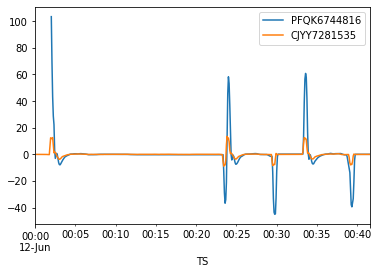

Index of pair: 52
Corr at time lag: -1.0


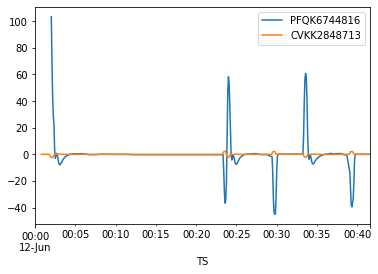

Index of pair: 53
Corr at time lag: -1.0


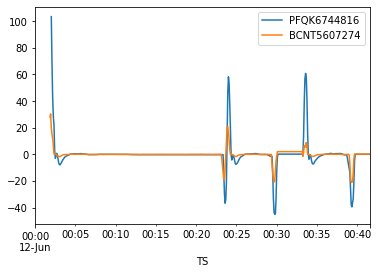

Index of pair: 54
Corr at time lag: -1.0


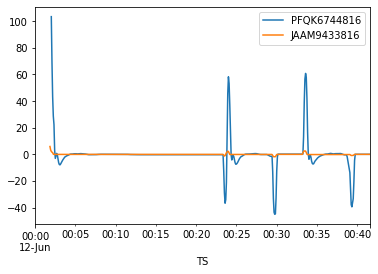

Index of pair: 55
Corr at time lag: -1.0


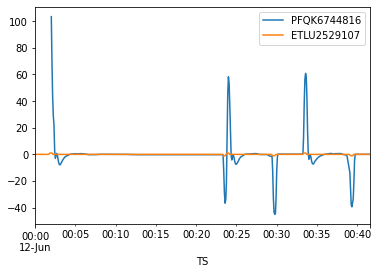

Index of pair: 56
Corr at time lag: -1.0


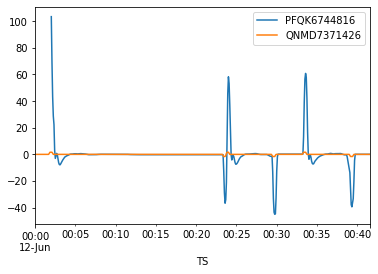

Index of pair: 57
Corr at time lag: -1.0


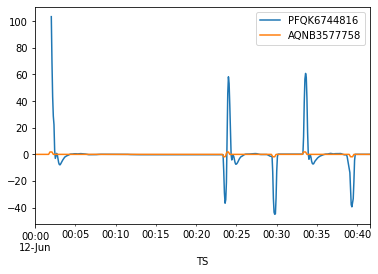

Index of pair: 58
Corr at time lag: -1.0


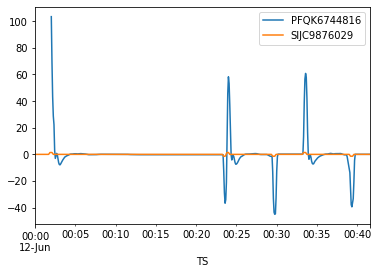

Index of pair: 59
Corr at time lag: -1.0


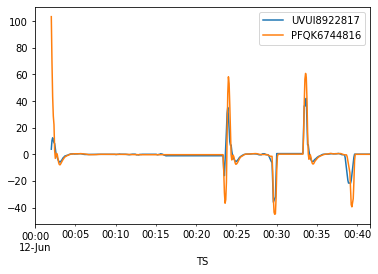

Index of pair: 60
Corr at time lag: -1.0


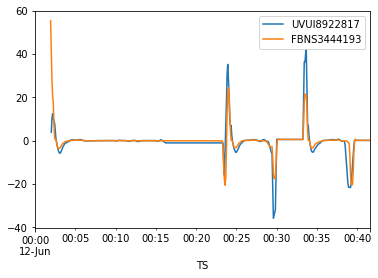

Index of pair: 61
Corr at time lag: -1.0


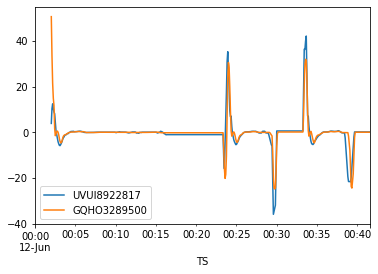

Index of pair: 62
Corr at time lag: -1.0


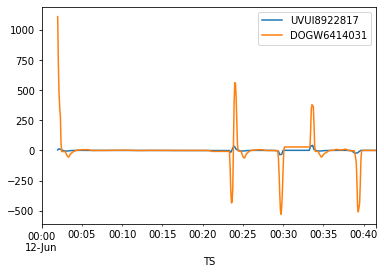

Index of pair: 63
Corr at time lag: -1.0


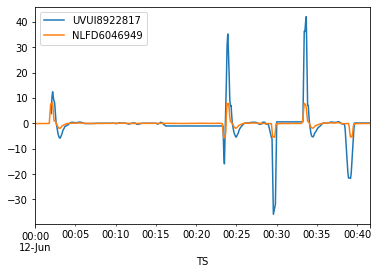

Index of pair: 64
Corr at time lag: -1.0


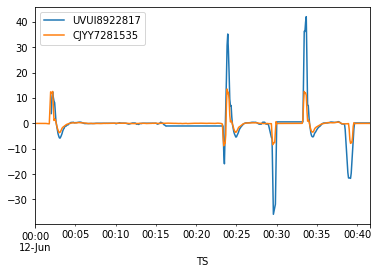

Index of pair: 65
Corr at time lag: -1.0


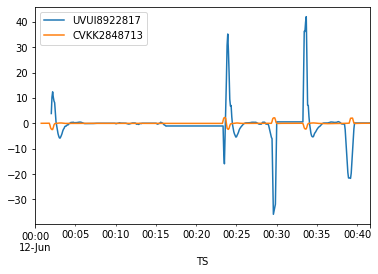

Index of pair: 66
Corr at time lag: -1.0


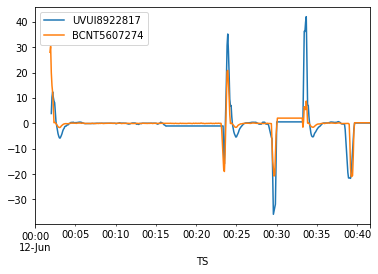

Index of pair: 67
Corr at time lag: -1.0


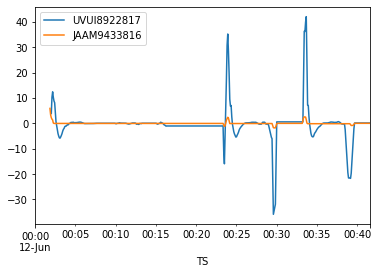

Index of pair: 68
Corr at time lag: -1.0


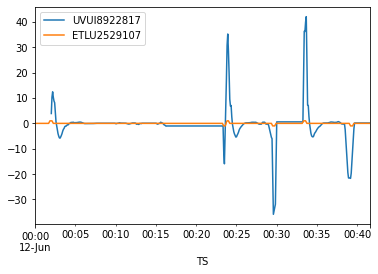

Index of pair: 69
Corr at time lag: -1.0


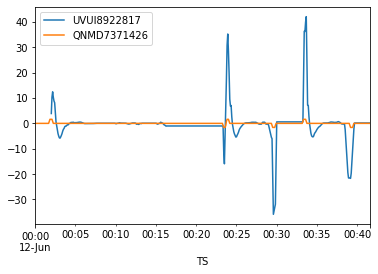

Index of pair: 70
Corr at time lag: -1.0


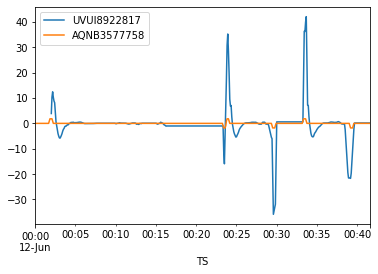

Index of pair: 71
Corr at time lag: -1.0


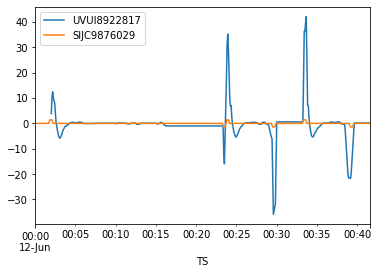

Index of pair: 72
Corr at time lag: -1.0


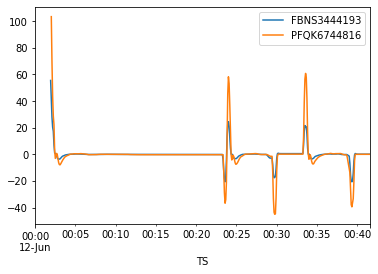

Index of pair: 73
Corr at time lag: -1.0


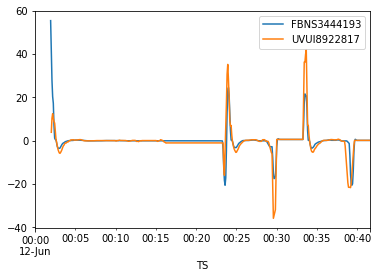

Index of pair: 74
Corr at time lag: -1.0


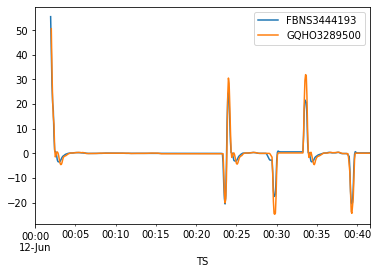

Index of pair: 75
Corr at time lag: -1.0


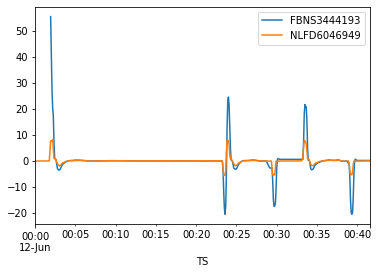

Index of pair: 76
Corr at time lag: -1.0


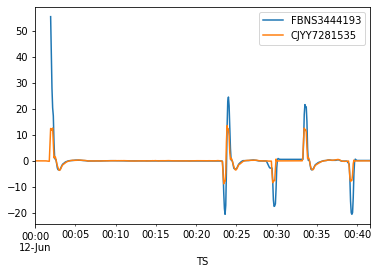

Index of pair: 77
Corr at time lag: -1.0


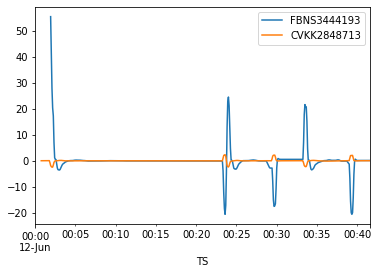

Index of pair: 78
Corr at time lag: -1.0


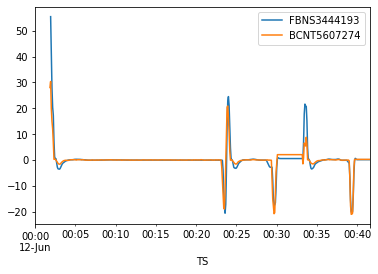

Index of pair: 79
Corr at time lag: -1.0


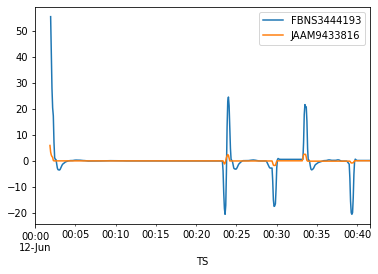

Index of pair: 80
Corr at time lag: -1.0


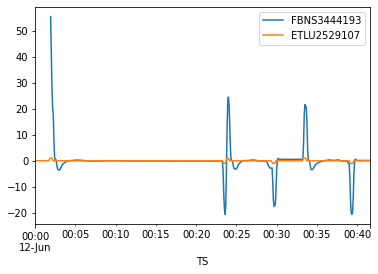

Index of pair: 81
Corr at time lag: -1.0


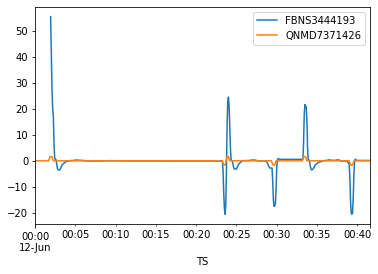

Index of pair: 82
Corr at time lag: -1.0


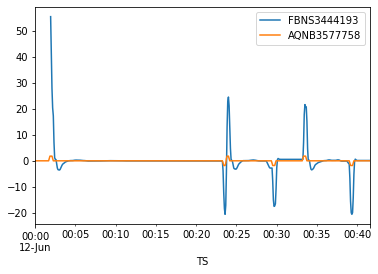

Index of pair: 83
Corr at time lag: -1.0


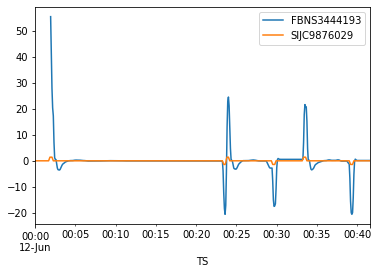

Index of pair: 84
Corr at time lag: -1.0


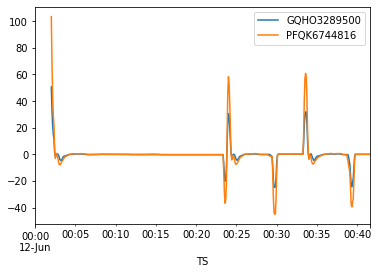

Index of pair: 85
Corr at time lag: -1.0


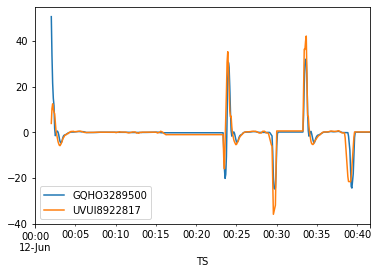

Index of pair: 86
Corr at time lag: -1.0


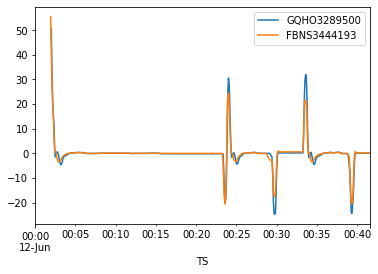

Index of pair: 87
Corr at time lag: -1.0


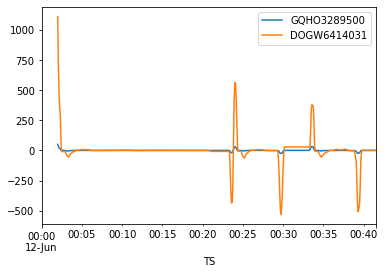

Index of pair: 88
Corr at time lag: -2.0


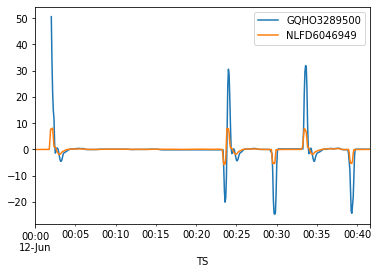

Index of pair: 89
Corr at time lag: -2.0


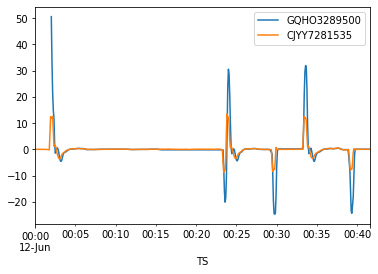

Index of pair: 90
Corr at time lag: -1.0


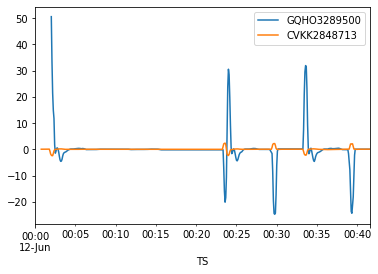

Index of pair: 91
Corr at time lag: -2.0


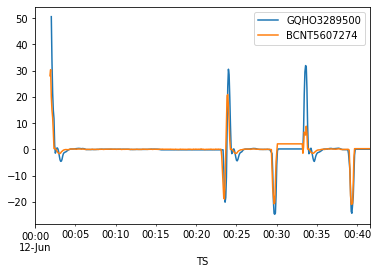

Index of pair: 92
Corr at time lag: -2.0


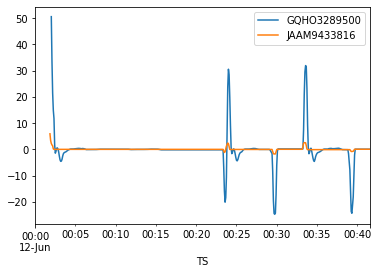

Index of pair: 93
Corr at time lag: -2.0


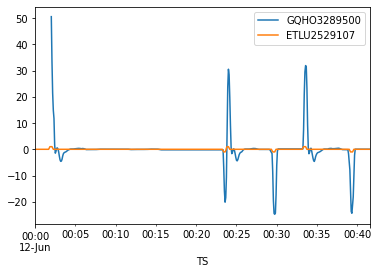

Index of pair: 94
Corr at time lag: -2.0


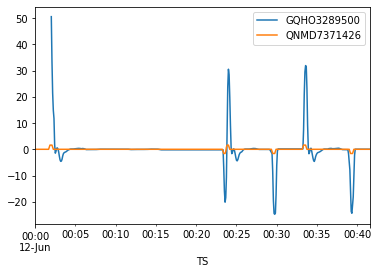

Index of pair: 95
Corr at time lag: -2.0


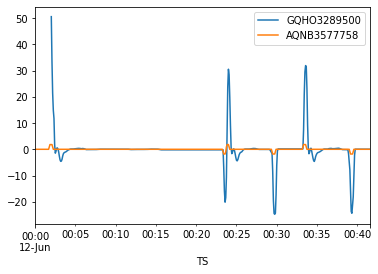

Index of pair: 96
Corr at time lag: -2.0


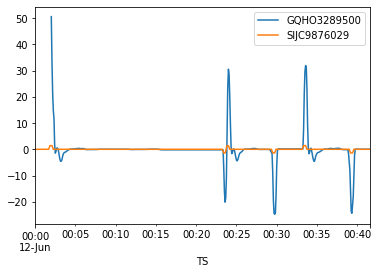

Index of pair: 97
Corr at time lag: -1.0


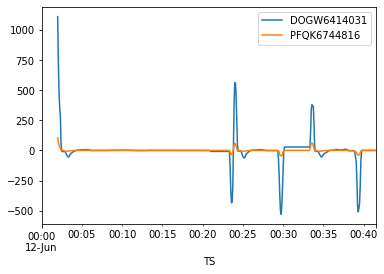

Index of pair: 98
Corr at time lag: -1.0


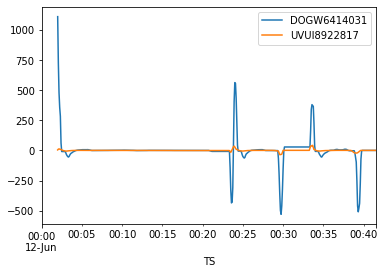

Index of pair: 99
Corr at time lag: -2.0


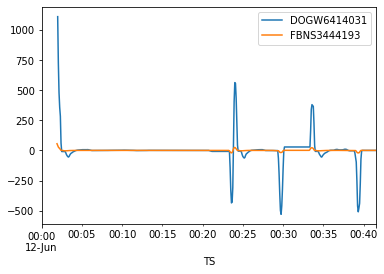

Index of pair: 100
Corr at time lag: -1.0


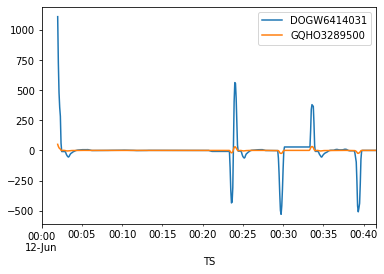

Index of pair: 101
Corr at time lag: -2.0


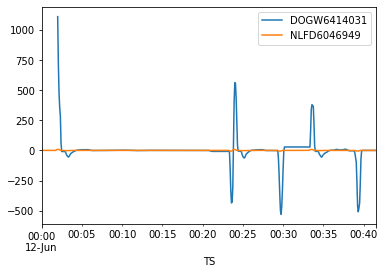

Index of pair: 102
Corr at time lag: -2.0


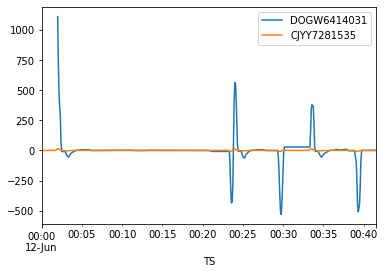

Index of pair: 103
Corr at time lag: -1.0


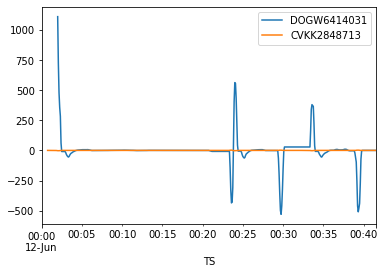

Index of pair: 104
Corr at time lag: -2.0


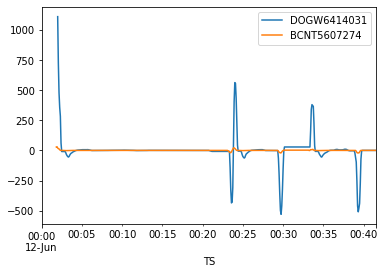

Index of pair: 105
Corr at time lag: -2.0


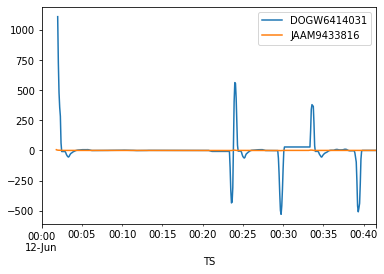

Index of pair: 106
Corr at time lag: -2.0


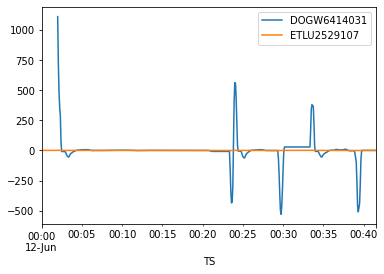

Index of pair: 107
Corr at time lag: -2.0


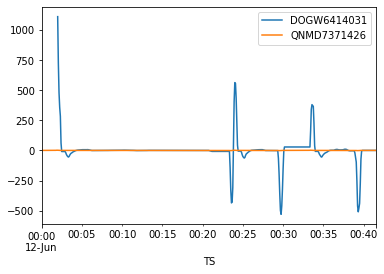

Index of pair: 108
Corr at time lag: -2.0


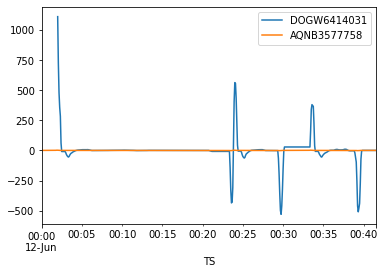

Index of pair: 109
Corr at time lag: -2.0


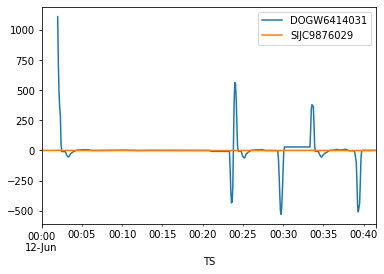

Index of pair: 110
Corr at time lag: -1.0


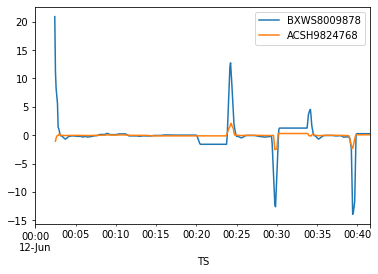

Index of pair: 111
Corr at time lag: -1.0


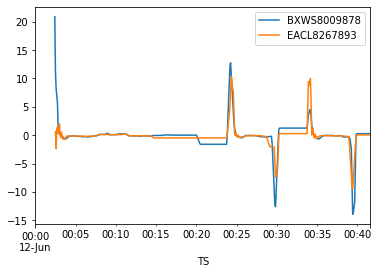

Index of pair: 112
Corr at time lag: -1.0


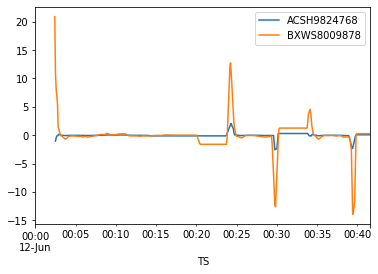

Index of pair: 113
Corr at time lag: -1.0


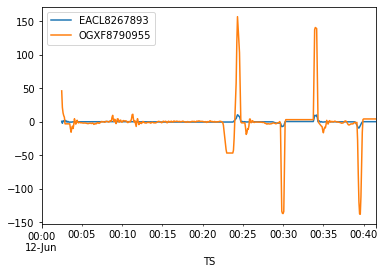

Index of pair: 114
Corr at time lag: -1.0


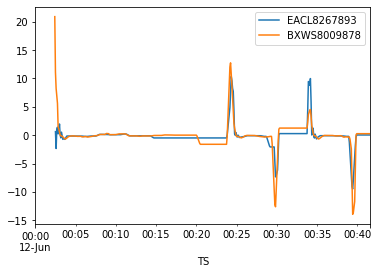

Index of pair: 115
Corr at time lag: -2.0


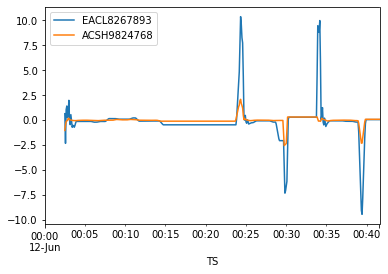

Index of pair: 116
Corr at time lag: -1.0


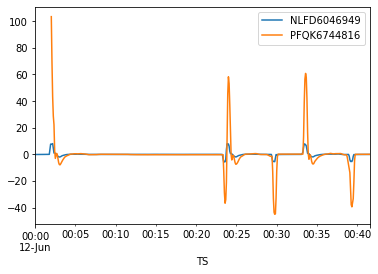

Index of pair: 117
Corr at time lag: -1.0


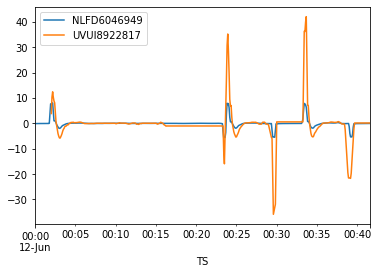

Index of pair: 118
Corr at time lag: -1.0


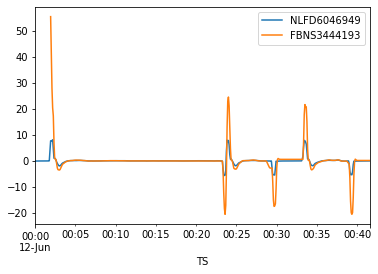

Index of pair: 119
Corr at time lag: -1.0


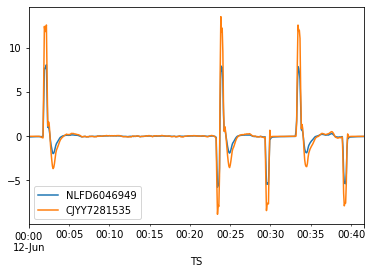

Index of pair: 120
Corr at time lag: -1.0


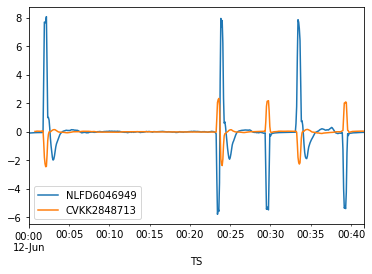

Index of pair: 121
Corr at time lag: -1.0


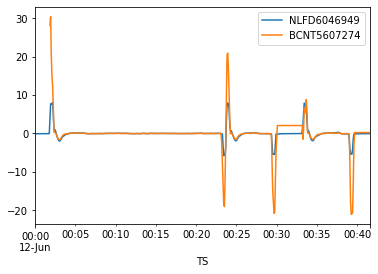

Index of pair: 122
Corr at time lag: -3.0


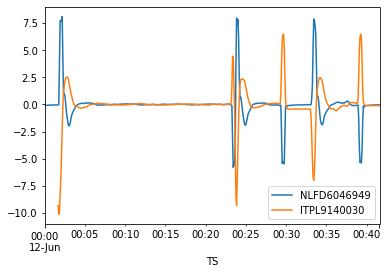

Index of pair: 123
Corr at time lag: -1.0


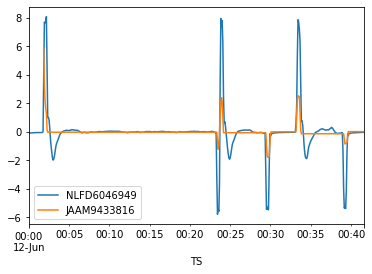

Index of pair: 124
Corr at time lag: -1.0


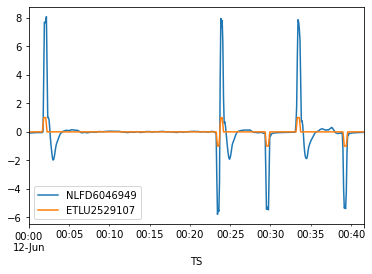

Index of pair: 125
Corr at time lag: -1.0


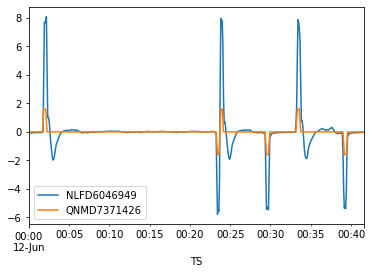

Index of pair: 126
Corr at time lag: -1.0


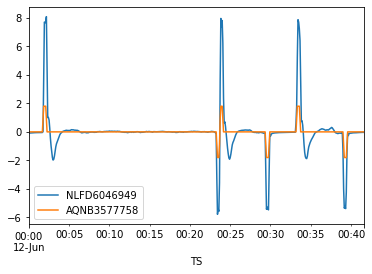

Index of pair: 127
Corr at time lag: -1.0


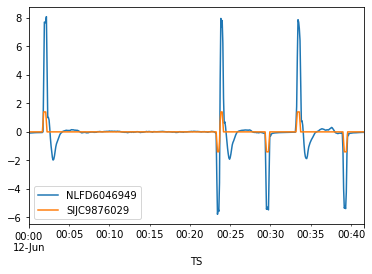

Index of pair: 128
Corr at time lag: -1.0


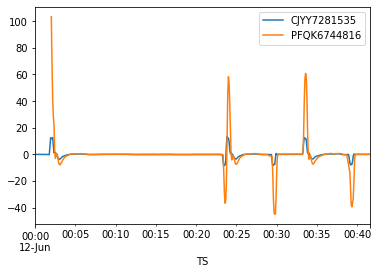

Index of pair: 129
Corr at time lag: -1.0


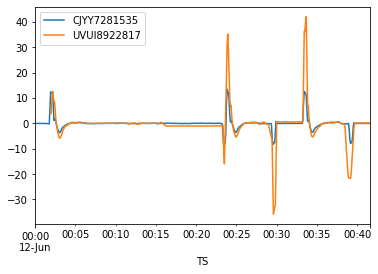

Index of pair: 130
Corr at time lag: -1.0


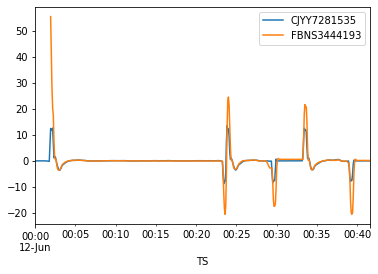

Index of pair: 131
Corr at time lag: -1.0


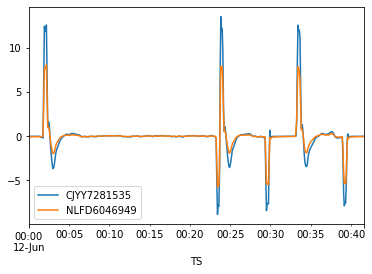

Index of pair: 132
Corr at time lag: -1.0


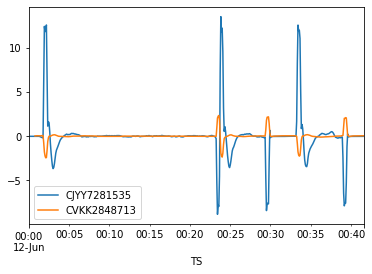

Index of pair: 133
Corr at time lag: -1.0


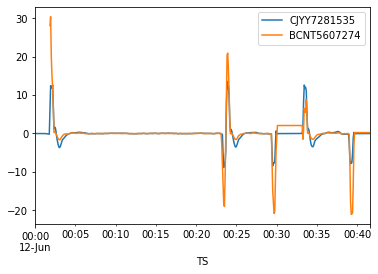

Index of pair: 134
Corr at time lag: -1.0


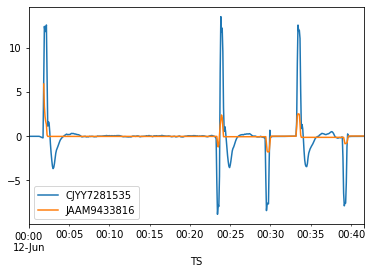

Index of pair: 135
Corr at time lag: -1.0


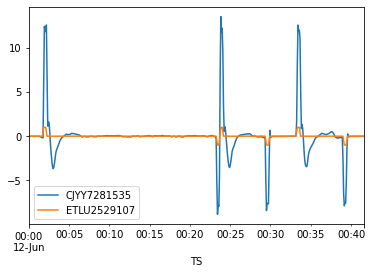

Index of pair: 136
Corr at time lag: -1.0


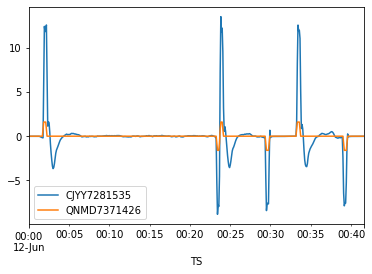

Index of pair: 137
Corr at time lag: -1.0


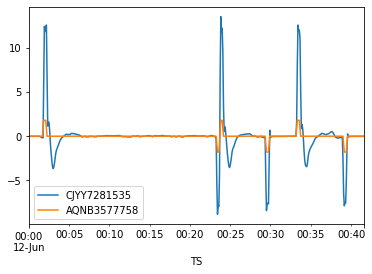

Index of pair: 138
Corr at time lag: -1.0


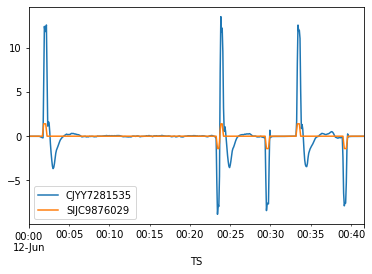

Index of pair: 139
Corr at time lag: -1.0


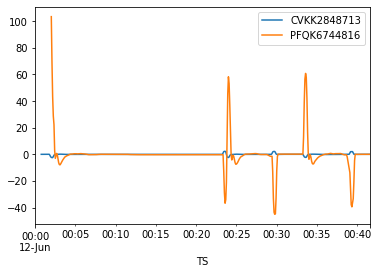

Index of pair: 140
Corr at time lag: -1.0


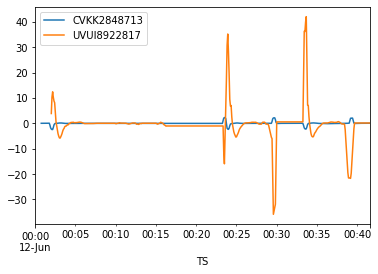

Index of pair: 141
Corr at time lag: -1.0


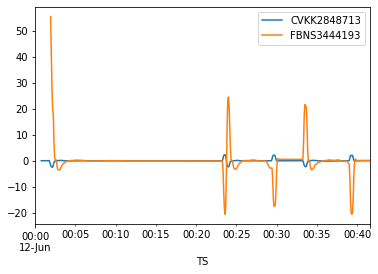

Index of pair: 142
Corr at time lag: -1.0


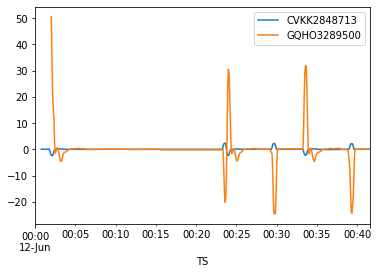

Index of pair: 143
Corr at time lag: -1.0


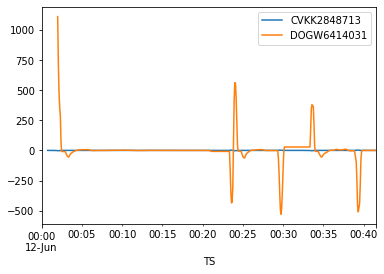

Index of pair: 144
Corr at time lag: -1.0


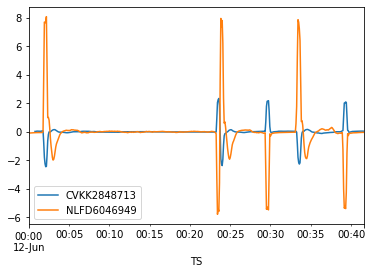

Index of pair: 145
Corr at time lag: -1.0


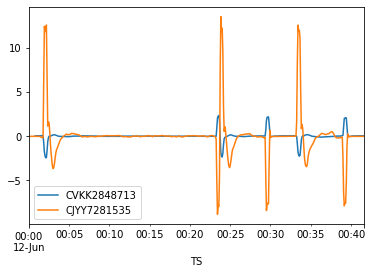

Index of pair: 146
Corr at time lag: -1.0


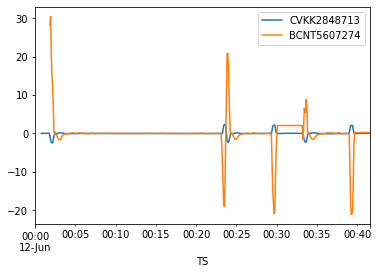

Index of pair: 147
Corr at time lag: -1.0


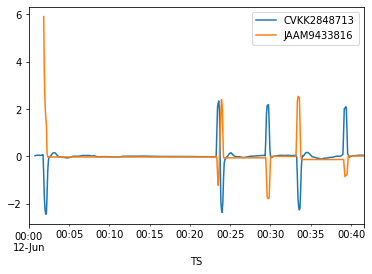

Index of pair: 148
Corr at time lag: -1.0


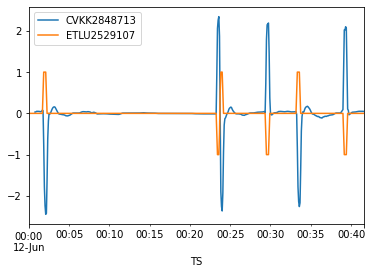

Index of pair: 149
Corr at time lag: -1.0


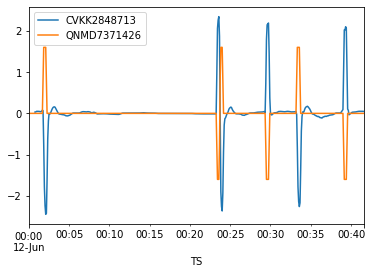

Index of pair: 150
Corr at time lag: -1.0


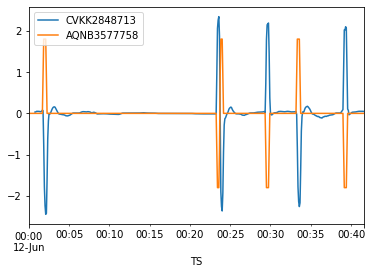

Index of pair: 151
Corr at time lag: -1.0


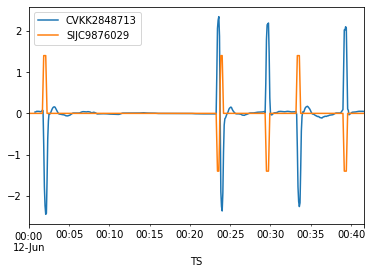

Index of pair: 152
Corr at time lag: -1.0


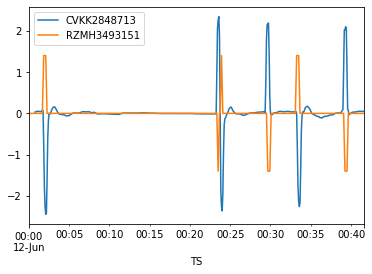

Index of pair: 153
Corr at time lag: -1.0


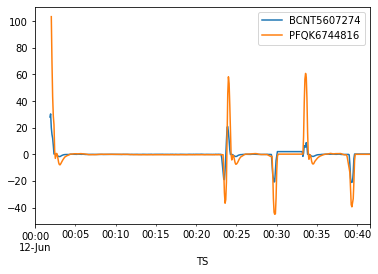

Index of pair: 154
Corr at time lag: -1.0


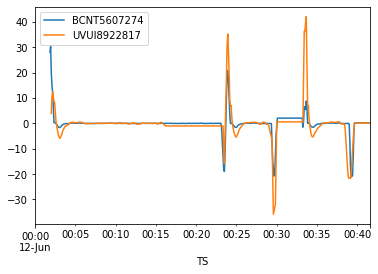

Index of pair: 155
Corr at time lag: -1.0


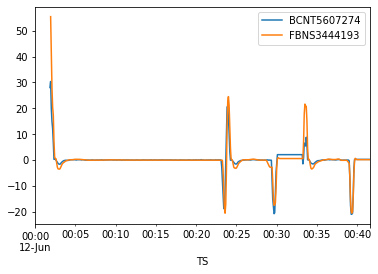

Index of pair: 156
Corr at time lag: -1.0


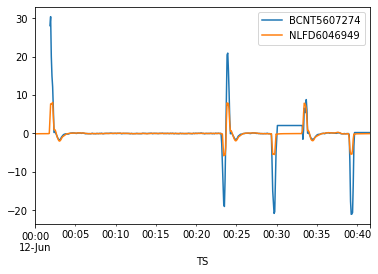

Index of pair: 157
Corr at time lag: -1.0


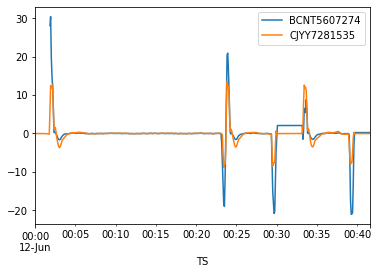

Index of pair: 158
Corr at time lag: -1.0


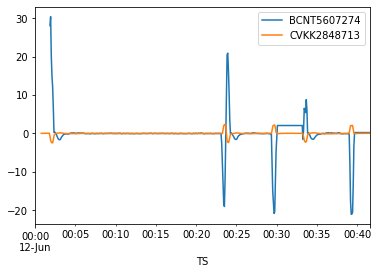

Index of pair: 159
Corr at time lag: -1.0


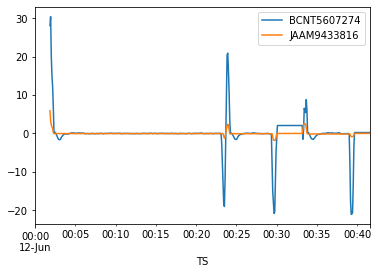

Index of pair: 160
Corr at time lag: -1.0


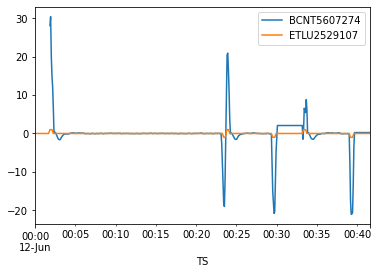

Index of pair: 161
Corr at time lag: -1.0


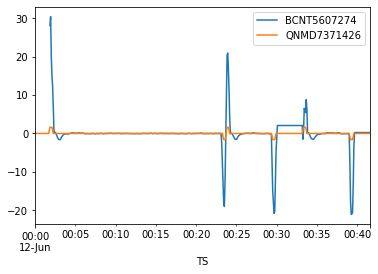

Index of pair: 162
Corr at time lag: -1.0


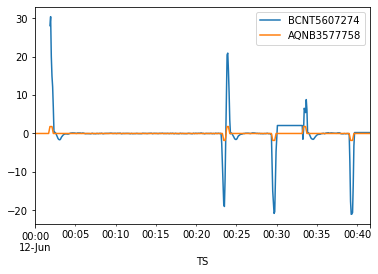

Index of pair: 163
Corr at time lag: -1.0


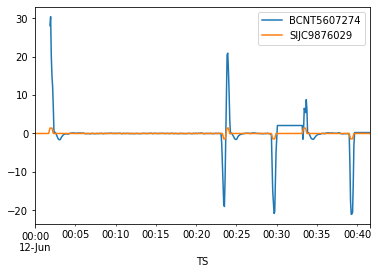

Index of pair: 164
Corr at time lag: -1.0


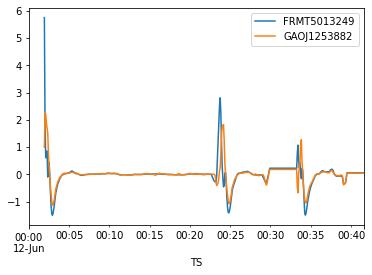

Index of pair: 165
Corr at time lag: -1.0


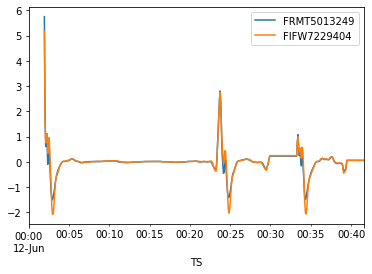

Index of pair: 166
Corr at time lag: -1.0


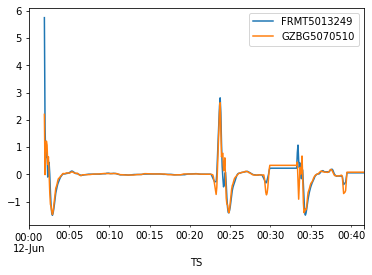

Index of pair: 167
Corr at time lag: -1.0


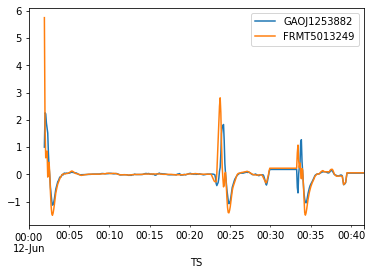

Index of pair: 168
Corr at time lag: -1.0


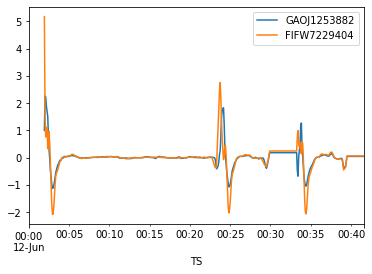

Index of pair: 169
Corr at time lag: -1.0


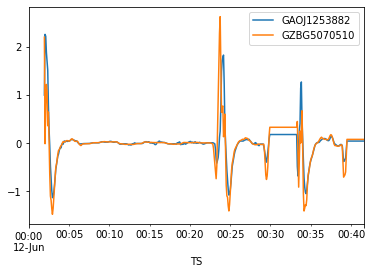

Index of pair: 170
Corr at time lag: -1.0


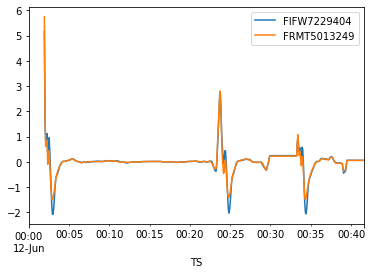

Index of pair: 171
Corr at time lag: -1.0


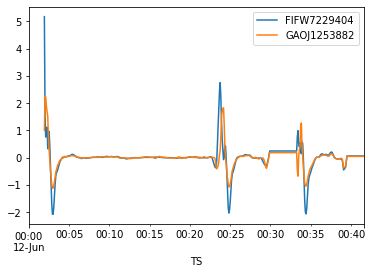

Index of pair: 172
Corr at time lag: -2.0


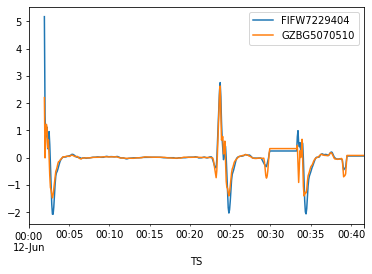

Index of pair: 173
Corr at time lag: -2.0


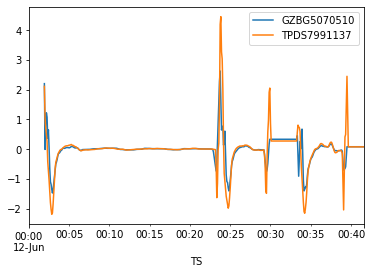

Index of pair: 174
Corr at time lag: -2.0


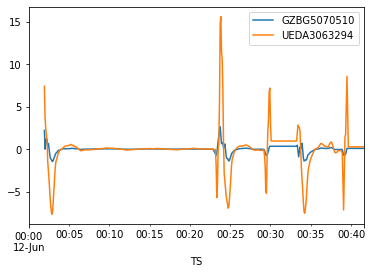

Index of pair: 175
Corr at time lag: -2.0


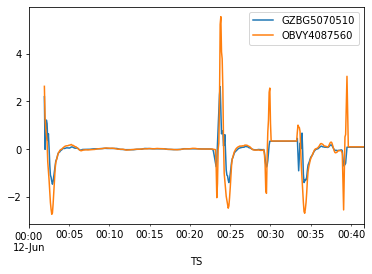

Index of pair: 176
Corr at time lag: -2.0


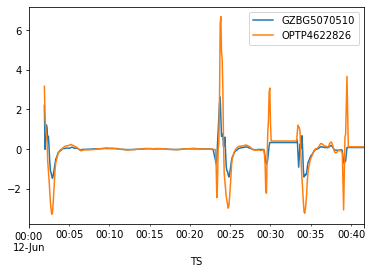

Index of pair: 177
Corr at time lag: -1.0


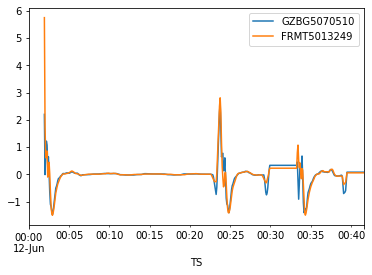

Index of pair: 178
Corr at time lag: -1.0


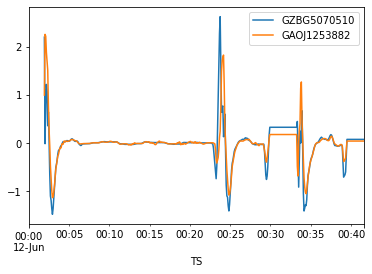

Index of pair: 179
Corr at time lag: -1.0


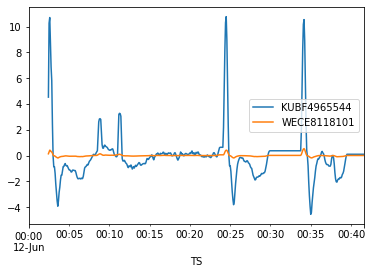

Index of pair: 180
Corr at time lag: -1.0


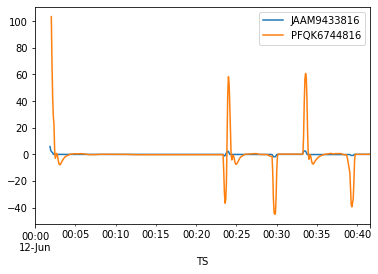

Index of pair: 181
Corr at time lag: -1.0


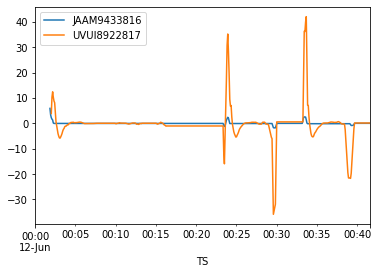

Index of pair: 182
Corr at time lag: -1.0


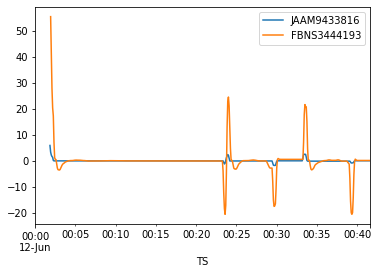

Index of pair: 183
Corr at time lag: -1.0


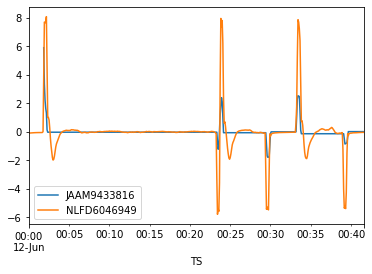

Index of pair: 184
Corr at time lag: -1.0


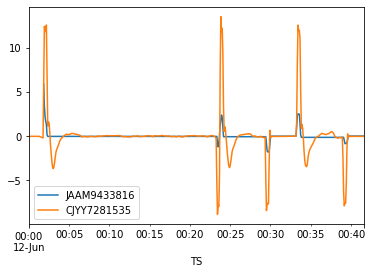

Index of pair: 185
Corr at time lag: -1.0


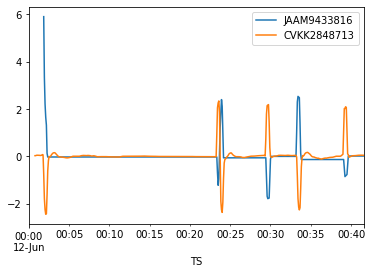

Index of pair: 186
Corr at time lag: -1.0


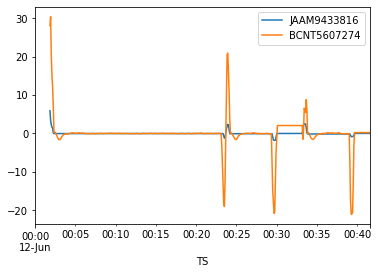

Index of pair: 187
Corr at time lag: -1.0


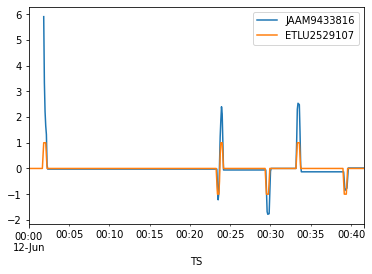

Index of pair: 188
Corr at time lag: -1.0


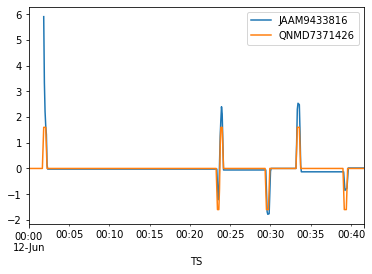

Index of pair: 189
Corr at time lag: -1.0


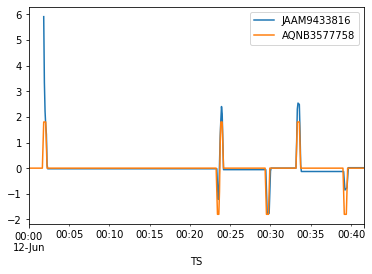

Index of pair: 190
Corr at time lag: -1.0


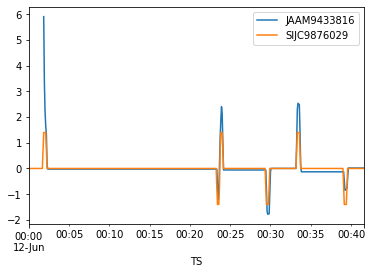

Index of pair: 191
Corr at time lag: -1.0


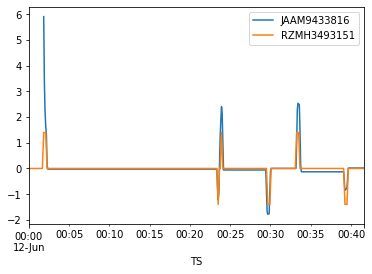

Index of pair: 192
Corr at time lag: -1.0


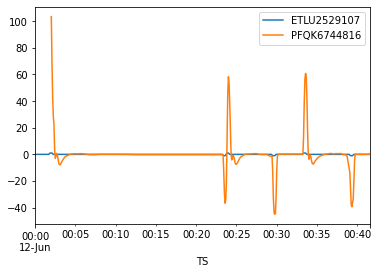

Index of pair: 193
Corr at time lag: -1.0


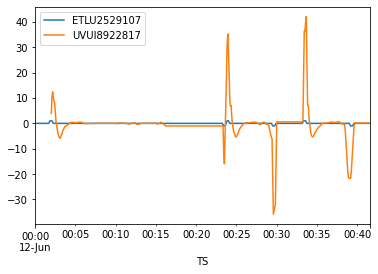

Index of pair: 194
Corr at time lag: -1.0


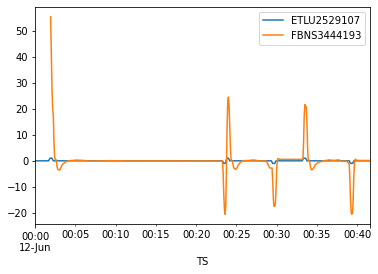

Index of pair: 195
Corr at time lag: -1.0


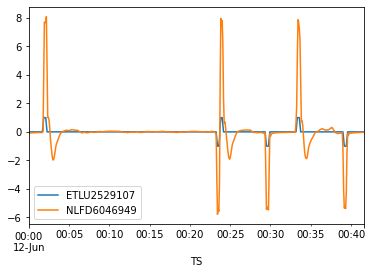

Index of pair: 196
Corr at time lag: -1.0


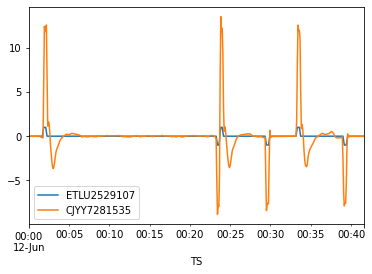

Index of pair: 197
Corr at time lag: -1.0


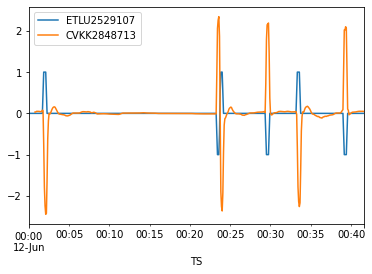

Index of pair: 198
Corr at time lag: -1.0


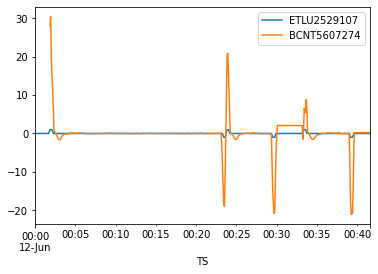

Index of pair: 199
Corr at time lag: -1.0


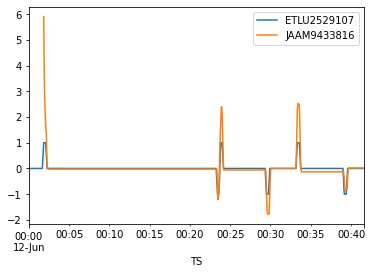

Index of pair: 200
Corr at time lag: -1.0


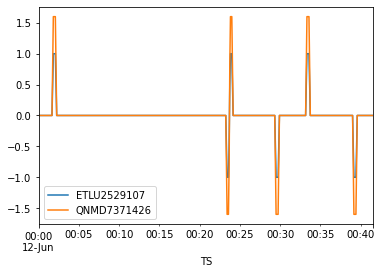

Index of pair: 201
Corr at time lag: -1.0


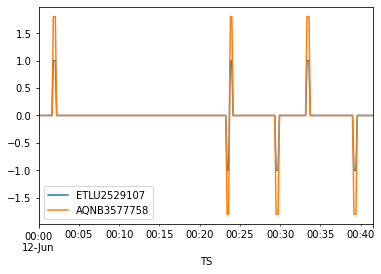

Index of pair: 202
Corr at time lag: -1.0


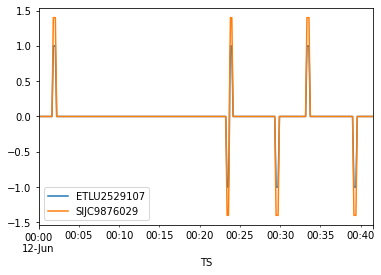

Index of pair: 203
Corr at time lag: -1.0


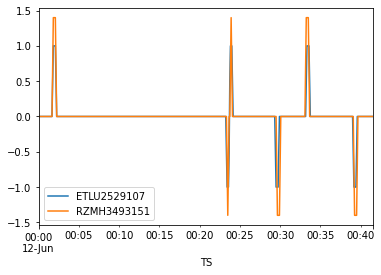

Index of pair: 204
Corr at time lag: -1.0


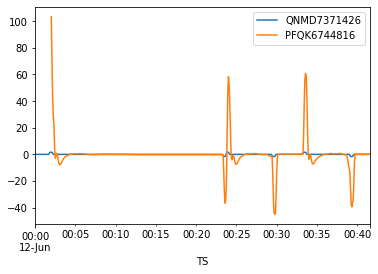

Index of pair: 205
Corr at time lag: -1.0


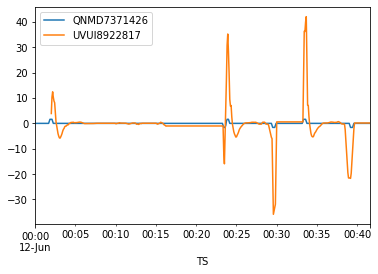

Index of pair: 206
Corr at time lag: -1.0


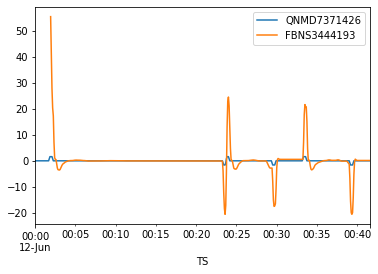

Index of pair: 207
Corr at time lag: -1.0


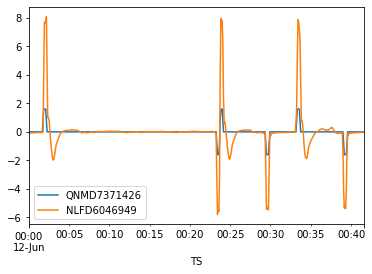

Index of pair: 208
Corr at time lag: -1.0


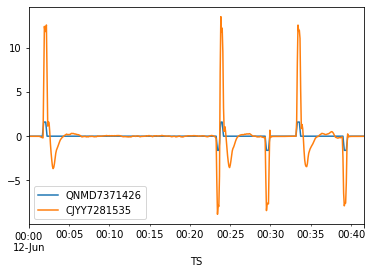

Index of pair: 209
Corr at time lag: -1.0


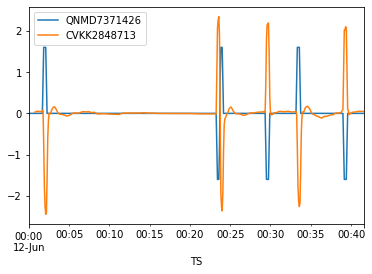

Index of pair: 210
Corr at time lag: -1.0


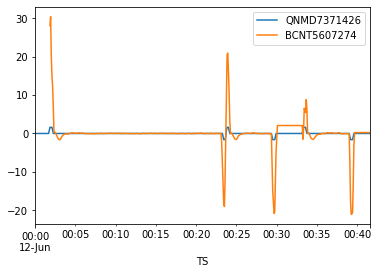

Index of pair: 211
Corr at time lag: -1.0


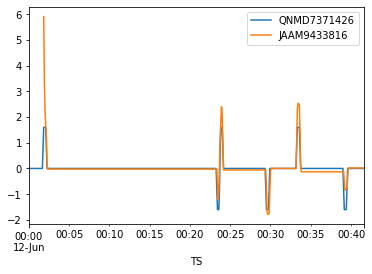

Index of pair: 212
Corr at time lag: -1.0


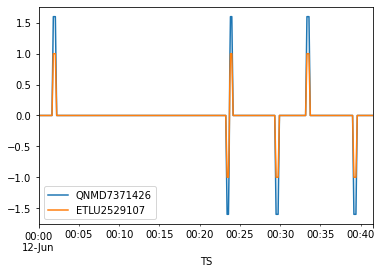

Index of pair: 213
Corr at time lag: -1.0


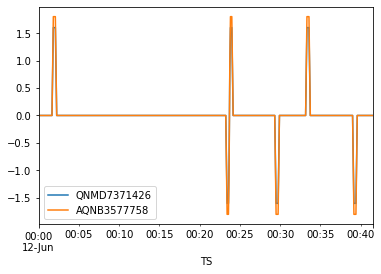

Index of pair: 214
Corr at time lag: -1.0


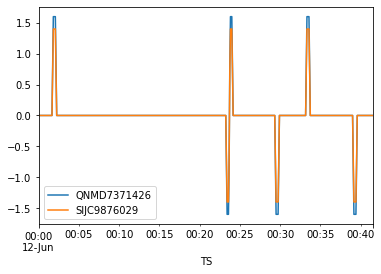

Index of pair: 215
Corr at time lag: -1.0


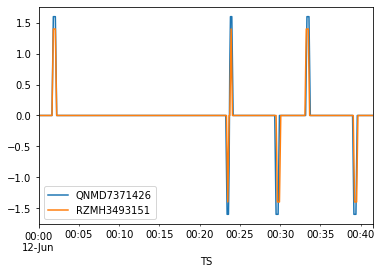

Index of pair: 216
Corr at time lag: -1.0


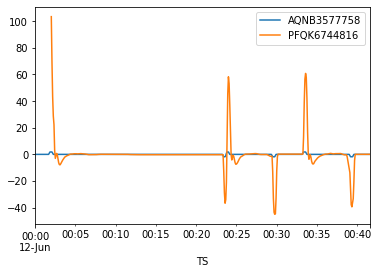

Index of pair: 217
Corr at time lag: -1.0


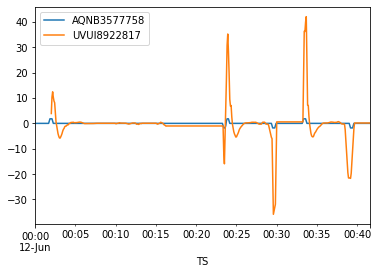

Index of pair: 218
Corr at time lag: -1.0


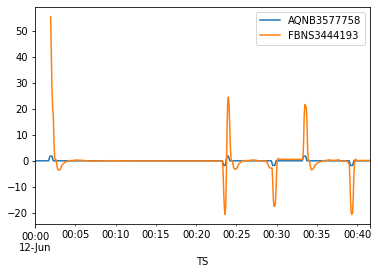

Index of pair: 219
Corr at time lag: -1.0


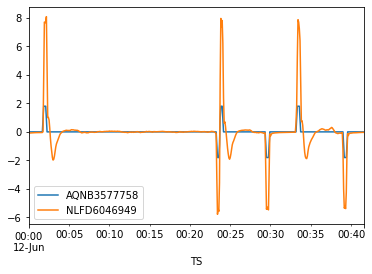

Index of pair: 220
Corr at time lag: -1.0


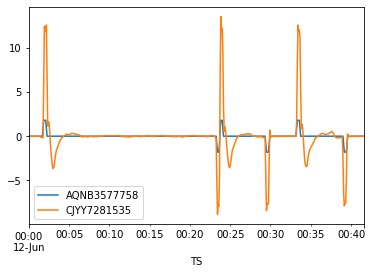

Index of pair: 221
Corr at time lag: -1.0


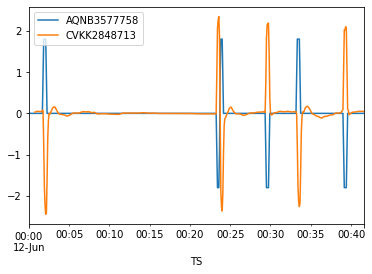

Index of pair: 222
Corr at time lag: -1.0


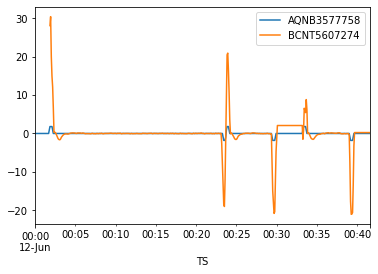

Index of pair: 223
Corr at time lag: -1.0


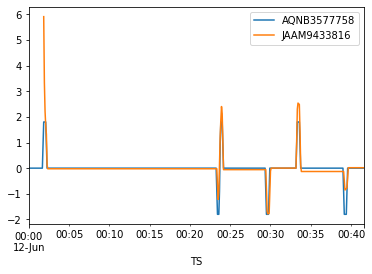

Index of pair: 224
Corr at time lag: -1.0


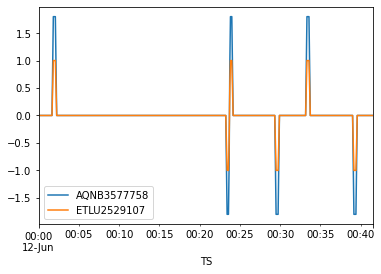

Index of pair: 225
Corr at time lag: -1.0


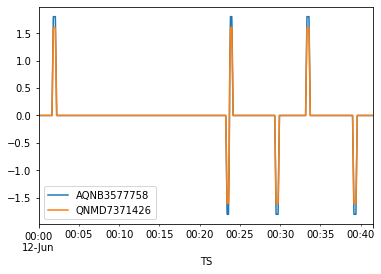

Index of pair: 226
Corr at time lag: -1.0


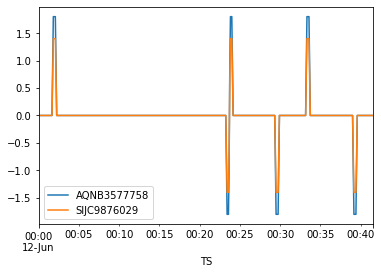

Index of pair: 227
Corr at time lag: -1.0


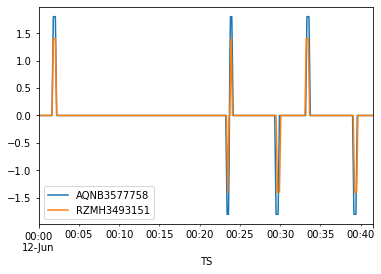

Index of pair: 228
Corr at time lag: -1.0


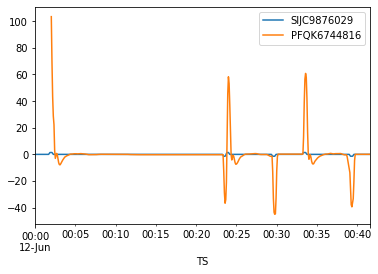

Index of pair: 229
Corr at time lag: -1.0


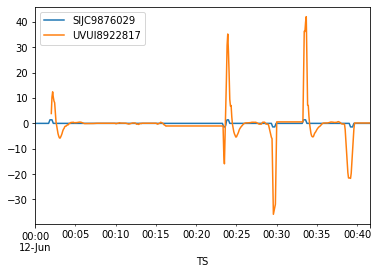

Index of pair: 230
Corr at time lag: -1.0


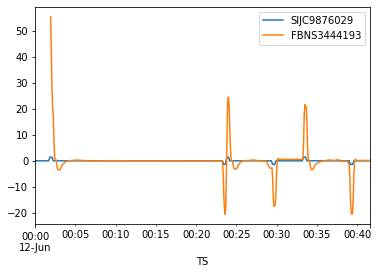

Index of pair: 231
Corr at time lag: -1.0


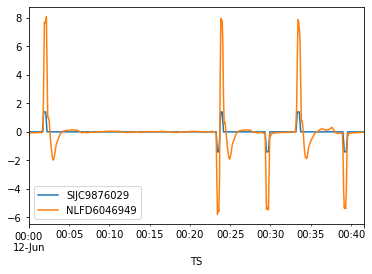

Index of pair: 232
Corr at time lag: -1.0


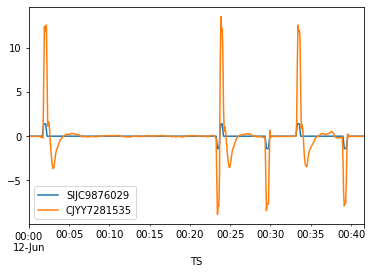

Index of pair: 233
Corr at time lag: -1.0


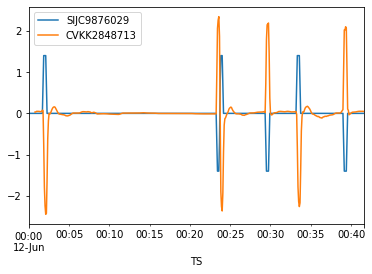

Index of pair: 234
Corr at time lag: -1.0


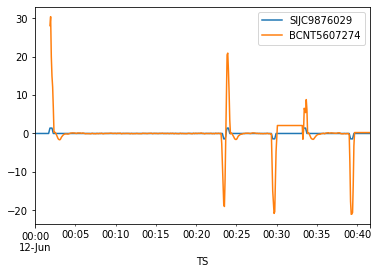

Index of pair: 235
Corr at time lag: -1.0


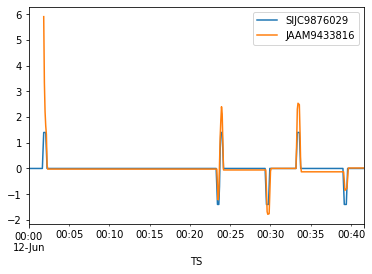

Index of pair: 236
Corr at time lag: -1.0


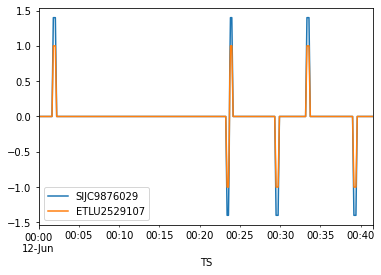

Index of pair: 237
Corr at time lag: -1.0


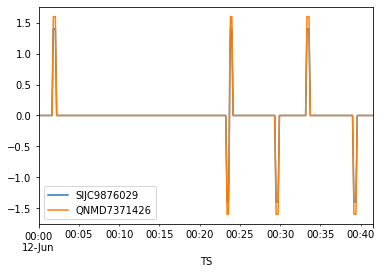

Index of pair: 238
Corr at time lag: -1.0


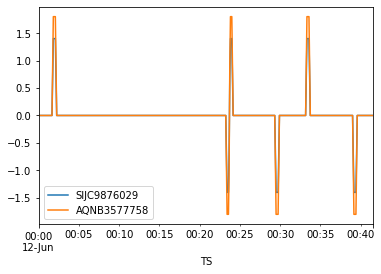

Index of pair: 239
Corr at time lag: -1.0


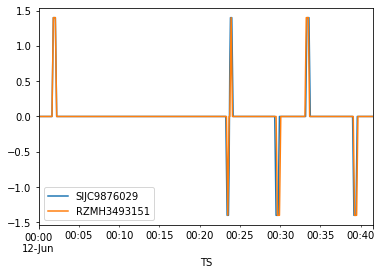

Index of pair: 240
Corr at time lag: -1.0


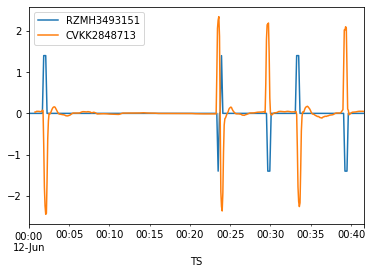

Index of pair: 241
Corr at time lag: -2.0


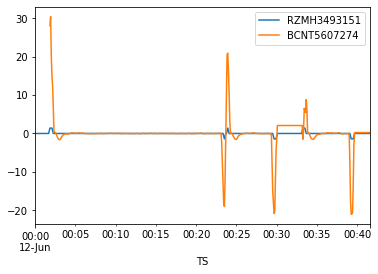

Index of pair: 242
Corr at time lag: -1.0


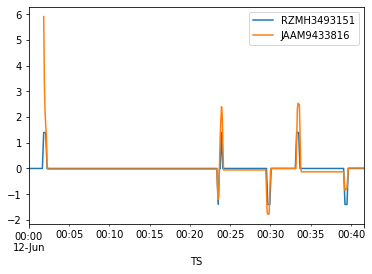

Index of pair: 243
Corr at time lag: -1.0


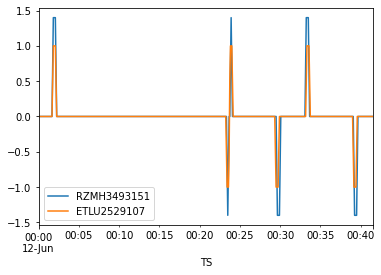

Index of pair: 244
Corr at time lag: -1.0


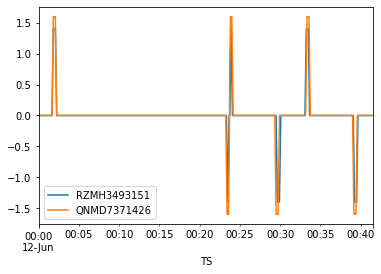

Index of pair: 245
Corr at time lag: -1.0


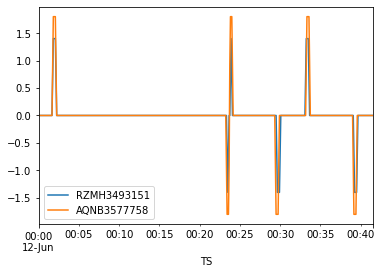

Index of pair: 246
Corr at time lag: -1.0


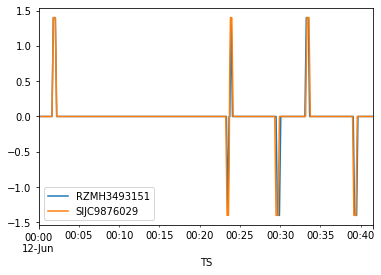

%%%%%%%%%%%%%%%%%%%%%%%%%
%%%% SIGN: 1
%%%%%%%%%%%%%%%%%%%%%%%%%
Index of pair: 0
Corr at time lag: 1.0


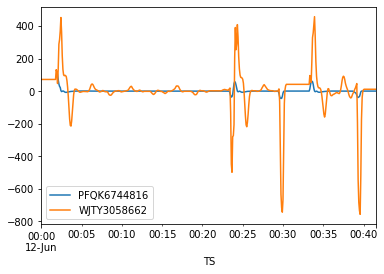

Index of pair: 1
Corr at time lag: 1.0


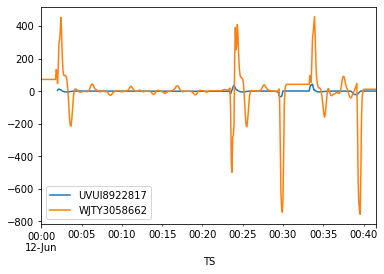

Index of pair: 2
Corr at time lag: 1.0


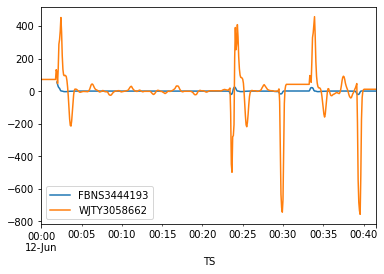

Index of pair: 3
Corr at time lag: 1.0


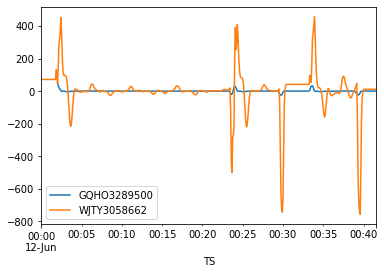

Index of pair: 4
Corr at time lag: 1.0


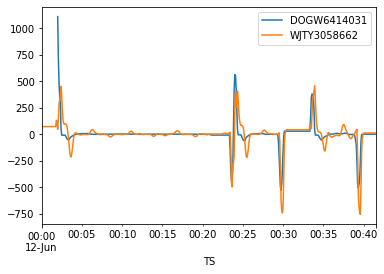

Index of pair: 5
Corr at time lag: 2.0


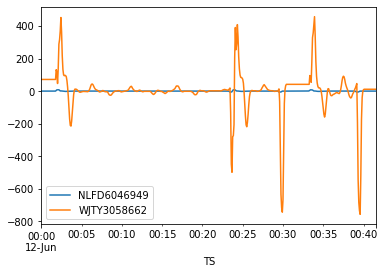

Index of pair: 6
Corr at time lag: 2.0


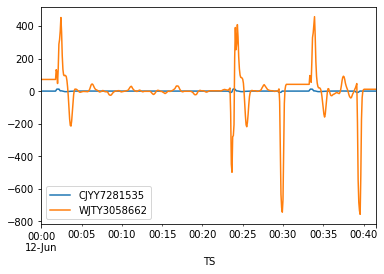

Index of pair: 7
Corr at time lag: 1.0


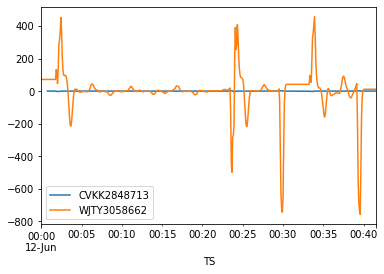

Index of pair: 8
Corr at time lag: 1.0


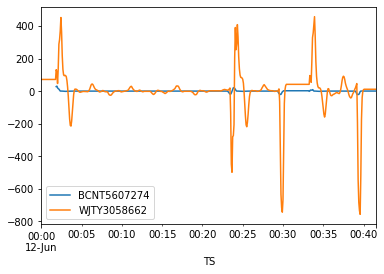

Index of pair: 9
Corr at time lag: 1.0


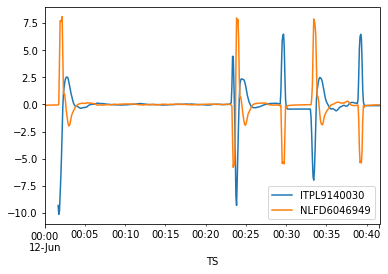

Index of pair: 10
Corr at time lag: 1.0


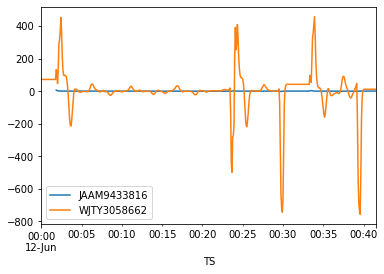

Index of pair: 11
Corr at time lag: 1.0


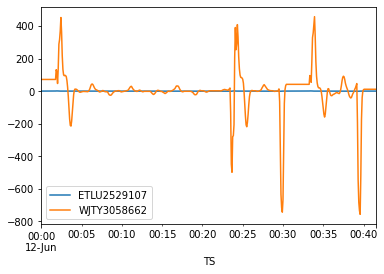

Index of pair: 12
Corr at time lag: 1.0


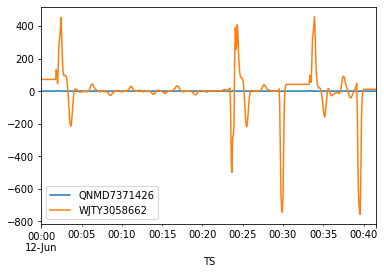

Index of pair: 13
Corr at time lag: 1.0


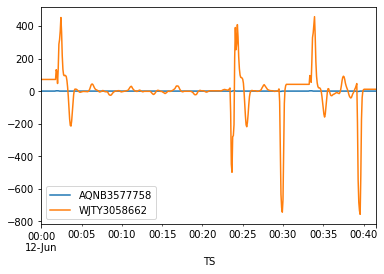

Index of pair: 14
Corr at time lag: 1.0


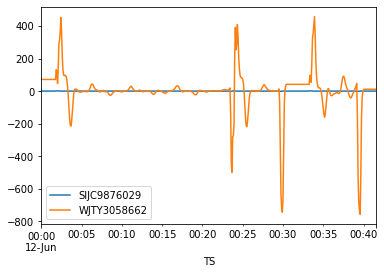

In [44]:
if PLOT_ALL_SENSOR_PAIRS:
    for sign in [0, -1, 1]:
        print("%%%%%%%%%%%%%%%%%%%%%%%%%")
        print(f"%%%% SIGN: {sign}")
        print("%%%%%%%%%%%%%%%%%%%%%%%%%")
        selection_df = filtered_max_output[filtered_max_output['sign'] == sign]
        selection_df.sort_values('correlation', ascending=False)
        pairs = selection_df.index.tolist()
        lags = selection_df['lag'].tolist()

        for single_pair in pairs:
            index = pairs.index(single_pair)
            print(f"Index of pair: {index}")
            print(f"Corr at time lag: {lags[index]}")
            utils.plot_pairs(single_pair, smooth_df, n_end=500)